# Pandas 객체

## Series 객체

In [1]:
import pandas as pd
import numpy as np

series = pd.Series([1, 2, 3, 4, 5])
# Series를 만들때 리스트로만 묶고서 객체화했을 땐, 정수형 인덱스가 자동으로 생성됌
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [2]:
T_series = pd.Series([1, 2, 3, 4, 5],
                    index=['a','b','c','d','e'])
# Series를 만들 때 index를 줘서 사용자 지정 인덱스를 만들수 있다.
T_series

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [3]:
T_series.values # values 메소드를 사용하면 해당 Series의 값들이 np.array형태로 반환됌

array([1, 2, 3, 4, 5], dtype=int64)

In [4]:
T_series.values[3] # values 메소드는 slicing이 가능한 객체

4

In [5]:
for i in range(0, 5, 2):
    # Slicing이 가능하기 때문에 for 문의 iteration을 적용하여 홀수값으로만 반환이 가능
    print(T_series.values[i])

1
3
5


In [6]:
T_series.index # index 메소드를 사용하면 해당 Series의 index 값들을 np.array형태로 반환됌

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
series.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
T_series[2:4] # Series 객체 또한 Slicing이 가능함

c    3
d    4
dtype: int64

In [9]:
T_series[::2] # Slicing이 가능하기 때문에 step을 주어 홀수값들만 반환

a    1
c    3
e    5
dtype: int64

In [10]:
T_series['f'] = 14 # Series는 dictionary의 원소를 방식으로 원소 추가가 가능함
T_series['ff'] = 4
T_series['g'] = np.nan # np.nan 값을 이용하여 결측치를 추가하는 방법이 있음
T_series

a      1.0
b      2.0
c      3.0
d      4.0
e      5.0
f     14.0
ff     4.0
g      NaN
dtype: float64

In [11]:
T_series.value_counts() # value_counts()를 이용하면 Series의 관측값의 빈도수를 파악할 수 있다.

4.0     2
3.0     1
2.0     1
14.0    1
5.0     1
1.0     1
dtype: int64

In [12]:
T_series.value_counts(sort = False)

3.0     1
2.0     1
14.0    1
5.0     1
4.0     2
1.0     1
dtype: int64

In [13]:
# value_counts(normalize = True)를 이용하면 빈도수가 비율형태로 나오게 된다.
# value_counts와 index, value를 이용하여 백분위로 values로 갖는 새로운 Series 생성하는 예
idx = T_series.value_counts().index
val = T_series.value_counts(normalize = True).values *100
hundred = dict()

for i, j in zip(idx, val):
    t = round(j, 1)
    hundred[i] = str(t) + ' %'

hundred = pd.Series(hundred)
hundred

4.0     28.6 %
3.0     14.3 %
2.0     14.3 %
14.0    14.3 %
5.0     14.3 %
1.0     14.3 %
dtype: object

In [14]:
# 딕셔너리 형태를 이용하여 새로운 Series를 생성할 수 있다.
book = pd.Series({'English':'English Grammer in use',
                  '태블로':'태블로 굿모닝 굿애프터눈',
                  '판다스':'파이썬 머신러닝 판다스 데이터 분석',
                  'ML':'파이썬 머신러닝 완벽가이드'})
book

English    English Grammer in use
태블로                 태블로 굿모닝 굿애프터눈
판다스           파이썬 머신러닝 판다스 데이터 분석
ML                 파이썬 머신러닝 완벽가이드
dtype: object

In [15]:
book['English']

'English Grammer in use'

In [16]:
book['English':'판다스']

English    English Grammer in use
태블로                 태블로 굿모닝 굿애프터눈
판다스           파이썬 머신러닝 판다스 데이터 분석
dtype: object

## DataFrame 객체

In [17]:
pd.DataFrame({'a':[1,3,4],
              'b':[1,2,4]})
# pd.DataFrame을 Dictionary형태로 만들때 'a'의 컬럼에 [1, 3, 4] 값이 있다는 형태로 만든다.

,a,b
0,1,1
1,3,2
2,4,4


In [18]:
pd.DataFrame([{'a':1, 'b':2, 'c':4}, {'a':2, 'b':3, 'd':5}])
# DataFrame의 data값에 list안에서 dictionary형태로 입력하면 row형태로 값을 입력할 수 있다.

,a,b,c,d
0,1,2,4.0,NaN
1,2,3,NaN,5.0


In [19]:
pd.DataFrame(
             [{'이*혁':3, '권*원':5, '송*미':2, '김*순':4},
              {'이*혁':1, '권*원':2, '송*미':4, '김*순':3},
              {'이*혁':2, '권*원':3, '송*미':1, '김*순':3}],
             index=['소주', '맥주', '와인'])
# DataFrame에 index 옵션을 입력하면 index를 원하는 값으로 지정할 수 있다.

,이*혁,권*원,송*미,김*순
소주,3,5,2,4
맥주,1,2,4,3
와인,2,3,1,3


In [20]:
pd.DataFrame({'이*혁':[3, 1, 2], '권*원':[5, 2, 3], '송*미':[2, 4, 1], '김*순':[4, 3, 3]}, 
             index = ['소주', '맥주','와인'])

,이*혁,권*원,송*미,김*순
소주,3,5,2,4
맥주,1,2,4,3
와인,2,3,1,3


In [21]:
Kim_dict = {'소주':13,
            '맥주':10,
            '와인':5,
            '위스키':2}
kim=pd.Series(Kim_dict)
kim

소주     13
맥주     10
와인      5
위스키     2
dtype: int64

In [22]:
lee_dict = {'소주':10,
            '맥주':3,
            '와인':4,
            '럼':2}
lee = pd.Series(lee_dict)
lee

소주    10
맥주     3
와인     4
럼      2
dtype: int64

In [23]:
drinks = pd.DataFrame({'김*순':kim,
                       '이*혁':lee})
# column명을 지정한 후 value값에 Series를 지정하여 DataFrame을 만들수 있다.
drinks

,김*순,이*혁
럼,NaN,2.0
맥주,10.0,3.0
소주,13.0,10.0
와인,5.0,4.0
위스키,2.0,NaN


In [24]:
drinks.index

Index(['럼', '맥주', '소주', '와인', '위스키'], dtype='object')

In [25]:
drinks.columns

Index(['김*순', '이*혁'], dtype='object')

In [26]:
drinks['맥주':'와인']

,김*순,이*혁
맥주,10.0,3.0
소주,13.0,10.0
와인,5.0,4.0


In [27]:
drinks['김*순']

럼       NaN
맥주     10.0
소주     13.0
와인      5.0
위스키     2.0
Name: 김*순, dtype: float64

## Index 객체

In [28]:
idx = pd.Index([0,1, 2, 3, 4, 5,6])
idx

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [29]:
idx[1]

1

In [30]:
idx[0:5:2]

Int64Index([0, 2, 4], dtype='int64')

In [31]:
didx = pd.DatetimeIndex(['2021-12-12', '2021-12-13'])
didx

DatetimeIndex(['2021-12-12', '2021-12-13'], dtype='datetime64[ns]', freq=None)

In [32]:
pdidx = pd.PeriodIndex(['2021-12', '2022-01'], freq='M')
pdidx

PeriodIndex(['2021-12', '2022-01'], dtype='period[M]', freq='M')

In [33]:
print(idx)
print(pdidx.size)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
2


In [34]:
pdidx_y = pd.PeriodIndex(['2021', '2022', '1999', '1954', '1441'], freq='Y')
pdidx_y

PeriodIndex(['2021', '2022', '1999', '1954', '1441'], dtype='period[A-DEC]', freq='A-DEC')

In [35]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
pd.DataFrame(data=range(5), index=pdidx_y)

,0
2021,0
2022,1
1999,2
1954,3
1441,4


### index 연산

In [36]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])

print(idx1.append(idx2))
print(idx1.difference(idx2)) # difference는 두 index의 차집합을 반환한다.
print(idx1^idx2)  # ^ 연산자는 두 index의 차집합을 반환하지만 추후 삭제 예정( difference 사용 추천 )
print(idx1 - idx2)  # 두 DataFrame의 값들의 차를 반환한다.
print(idx1.intersection(idx2)) # intersection은 두 index의 교집합을 반환한다.
print(idx1 & idx2) # & 연산자도 intersection를 사용하지만 추후에 삭제 예정( intersection을 사용 추천 )
print(idx1.union(idx2)) # union 함수는 두 index의 합집합을 반환 (중복을 제거함)
print(idx1|idx2) # | 연산자도 두 index의 합집합을 반환하지만 추후에 삭제 예정 ( union 사용 추천 )
print(idx1.delete(0)) # 인덱스 번호를 지정하여 그 해당하는 번호의 값을 제거
print(idx1.drop(1))   # 해당하는 값을 지정하여 그 값을 제거

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')


#### difference( )

In [37]:
a_index = pd.Index(range(1, 7))
a = pd.DataFrame(data = [1, 2, 3, 4, 5, 6], index = a_index)

b_index = pd.Index(range(1, 7, 2))
b = pd.DataFrame(data = [1, 3, 5], index = b_index)

c = pd.DataFrame(data = range(0, 6, 2), index = a_index.difference(b_index))
c

,0
2,0
4,2
6,4


In [38]:
a = pd.Index([1, 2, 3, 4, 5, 6, 7, 8, 9])
b = pd.Index(range(1, 9, 2))
c = pd.Index(a.difference(b))
c

Int64Index([2, 4, 6, 8, 9], dtype='int64')

#### intersection( )

In [39]:
a_index = pd.Index(range(1, 7))
a = pd.DataFrame(data=[1, 2, 3, 4, 5, 6], index=a_index)

b_index = pd.Index(range(1, 7, 2))
b = pd.DataFrame(data=[1, 3, 5], index=b_index)

c = pd.DataFrame(data=[2, 4, 6], index=a_index.intersection(b_index))
c

,0
1,2
3,4
5,6


In [40]:
a = pd.Index(range(1, 7))
b = pd.Index(range(1, 7, 2))
c = a.intersection(b)
list(c)

[1, 3, 5]

#### delete( )

In [41]:
a = pd.Index(range(1,7))
print(list(a))
a = a.delete(3)
print(list(a))  # a의 Index 번호 3번을 제외함

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 5, 6]


In [42]:
b = pd.Index(range(1, 11))
b = b.delete([1, 3, 5, 7, 9])
list(b)

[1, 3, 5, 7, 9]

#### drop( )

In [43]:
a = pd.Index(range(1,7))
print(list(a))
a = a.drop([1, 3, 5])
list(a)

[1, 2, 3, 4, 5, 6]


[2, 4, 6]

In [44]:
b = pd.Index(range(1, 11))
print(list(b))
b = b.drop([1, 5, 10])
list(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[2, 3, 4, 6, 7, 8, 9]

## 인덱싱( Indexing )

In [45]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0], 
             index = ['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [46]:
s[1] # index 번호로도 slicing이 가능

0.25

In [47]:
s['b'] # index의 이름으로도 slicing이 가능

0.25

In [48]:
s.keys() # keys를 쓰면 Series의 index 값을 반환한다.

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [49]:
a = pd.Series(index=[1, 2, 3, 4, 5])
for i, j in enumerate(s.keys()):
    a[i] = j
a

1      b
2      c
3      d
4      e
5    NaN
0      a
dtype: object

In [50]:
list(s.items()) # items( )메세드는 Series의 index값과 value들을 튜플로 반환한다.

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [51]:
s['f']= 1.25  # dictionary형태로 Series에 새로운 index와 value를 입력하면 새로운 셀을 추가할 수 있다.
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [52]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [53]:
s[ (s > 0.4) & (s < 0.8) ]

c    0.50
d    0.75
dtype: float64

In [54]:
d = pd.Series(data=range(1, 11), index=['a','b','c','d','e','f','g','h','i','j'])
print(d, end='\n')
d [ (d > 2) & (d < 7) ]

a     1
b     2
c     3
d     4
e     5
f     6
g     7
h     8
i     9
j    10
dtype: int64


c    3
d    4
e    5
f    6
dtype: int64

In [55]:
d[ (d < 4 ) | (d > 9) ]

a     1
b     2
c     3
j    10
dtype: int64

### Series 인덱싱

In [56]:
s = pd.Series(['a','b','c','d','e'],
              index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [57]:
s[1]

'a'

In [58]:
s[2:4]

5    c
7    d
dtype: object

In [59]:
s.iloc[1]

'b'

In [60]:
s.loc[1]

'a'

In [61]:
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [62]:
s.reindex(range(10))  # reindex는 index를 새로 생성하는데 기존에 있는 index와 value 모두가 추가하여 생성한다.

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [63]:
s.reindex(range(10), method='bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

In [64]:
s.reindex(range(10), method='ffill') # reindex를 하는데 앞의 값을 참조하여 해당 결측치를 채운다.
# 하지만 index[0]은 앞의 값이 존재하지 않기에 NaN값으로 나오게 된다.

0    NaN
1      a
2      a
3      b
4      b
5      c
6      c
7      d
8      d
9      e
dtype: object

### DataFrame 인덱싱

In [65]:
male_tuple = {'서울특별시': 4732275, 
              '부산광역시': 1668618,
              '인천광역시': 1476813,
              '대구광역시': 1198815,
              '대전광역시': 734441,
              '광주광역시': 720060}
male = pd.Series(male_tuple)

female_tuple = {'서울특별시': 4988571, 
                '부산광역시': 1735805,
                '인천광역시': 1470404,
                '대구광역시': 1229139,
                '대전광역시': 736599,
                '광주광역시': 734988}
female = pd.Series(female_tuple)

pop_tuple = {'서울특별시': 9720846, 
             '부산광역시': 3404423,
             '인천광역시': 2947217,
             '대구광역시': 2427954,
             '대전광역시': 1471040,
             '광주광역시': 1455048}
population = pd.Series(pop_tuple)

korea_df = pd.DataFrame({'인구수':population, 
                         '남자인구수':male,
                         '여자인구수':female})
# 컬럼명과 시리즈를 딕셔너리 형태로 묶어서 데이터 프레임을 만들수 있다.
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


In [66]:
korea_df.at['대전광역시','남자인구수']

734441

In [67]:
korea_df.at['서울특별시','인구수']

9720846

In [68]:
korea_df.at['부산광역시','남자인구수']

1668618

In [69]:
korea_df.at['인천광역시','여자인구수']
# korea_df.at['인천광역시':'대전광역시','남자인구수']
# 와 같이 at메소드에선 복수 index를 쓸수없다.

1470404

In [70]:
korea_df['남여비율'] = (korea_df.남자인구수 * 100 / korea_df.여자인구수)
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


#### values

In [71]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [72]:
df_index = pd.Index(['1번', '2번','3번'])
df = pd.DataFrame({'이름':['서준','인아', '인준'],
                   '수학':[90, 70, 80],
                   '영어':[98, 95, 80],
                   '음악':[85, 100, 80],
                   '체육':[100, 90, 80]}, 
                 index = df_index)
df

,이름,수학,영어,음악,체육
1번,서준,90,98,85,100
2번,인아,70,95,100,90
3번,인준,80,80,80,80


In [73]:
df.values

array([['서준', 90, 98, 85, 100],
       ['인아', 70, 95, 100, 90],
       ['인준', 80, 80, 80, 80]], dtype=object)

In [74]:
korea_df.values[0] # korea_df의 서울특별시의 value를 반환한다.

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [75]:
df.values[0] # df의 1번 value를 반환한다.

array(['서준', 90, 98, 85, 100], dtype=object)

#### loc/ iloc
DataFrame 객체.loc[행 인덱스, 열 이름]  
DataFrame 객체.iloc[행 번호, 열 번호]

df.iloc[:]의 형태는 행번호에 범위를 지정하여  
그 범위에 해당하는 모든 열을 가져오는 결과값을 반환한다.

In [76]:
df.loc['1번':'2번']

,이름,수학,영어,음악,체육
1번,서준,90,98,85,100
2번,인아,70,95,100,90


In [77]:
df.iloc[0:2]

,이름,수학,영어,음악,체육
1번,서준,90,98,85,100
2번,인아,70,95,100,90


In [78]:
df.loc['1번', '영어']

98

In [79]:
df.iloc[0,2]

98

df.iloc[:,:]의 형태는 행 번호에 범위를 지정하고  
열 번호에도 해당 범위를 지정하여  
그 지정된 범위안의 원소를 반환한다.

In [80]:
df.loc['1번':'2번','수학':'음악']

,수학,영어,음악
1번,90,98,85
2번,70,95,100


In [81]:
df.iloc[0:2,1:4]

,수학,영어,음악
1번,90,98,85
2번,70,95,100


In [82]:
df.iloc[1:3,2:]

,영어,음악,체육
2번,95,100,90
3번,80,80,80


In [83]:
df.loc['2번':'3번','영어':]

,영어,음악,체육
2번,95,100,90
3번,80,80,80


In [84]:
korea_df.loc[ (korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [85]:
df.loc[(df.수학 > 70)]

,이름,수학,영어,음악,체육
1번,서준,90,98,85,100
3번,인준,80,80,80,80


In [86]:
df[df.수학 > 70]

,이름,수학,영어,음악,체육
1번,서준,90,98,85,100
3번,인준,80,80,80,80


In [87]:
df.loc[(df.수학 != 80) & (df.영어 != 95)]

,이름,수학,영어,음악,체육
1번,서준,90,98,85,100


In [88]:
df[ (df.수학 != 80) & (df.영어 != 95) ]

,이름,수학,영어,음악,체육
1번,서준,90,98,85,100


### 다중 인덱스 (Multi Index)
- 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
- 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱승

#### 다중 인덱스 Series

In [89]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [90]:
idx_tuples = [('서울특별시',2010), ('서울특별시',2020),
              ('부산광역시',2010), ('부산광역시',2020),
              ('인천광역시',2010), ('인천광역시',2020),
              ('대구광역시', 2010), ('대구광역시',2020),
              ('대전광역시', 2010), ('대전광역시',2020),
              ('광주광역시', 2010), ('광주광역시',2020)
             ]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [91]:
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2847217,
              2511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, index = idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2847217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [92]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [93]:
population = population.reindex(midx)
population.index.names = ['행정구역','년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2847217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [94]:
df_tuples = [('1번','수학'), ('1번','영어'), ('1번','음악'),('1번','체육'),
             ('2번','수학'), ('2번','영어'), ('2번','음악'),('2번','체육'),
             ('3번','수학'), ('3번','영어'), ('3번','음악'),('3번','체육')]
mdf = pd.MultiIndex.from_tuples(df_tuples)
mdf 

MultiIndex([('1번', '수학'),
            ('1번', '영어'),
            ('1번', '음악'),
            ('1번', '체육'),
            ('2번', '수학'),
            ('2번', '영어'),
            ('2번', '음악'),
            ('2번', '체육'),
            ('3번', '수학'),
            ('3번', '영어'),
            ('3번', '음악'),
            ('3번', '체육')],
           )

In [95]:
numbers = ['1번', '2번', '3번', '4번']
subjects = ['수학', '영어', '음악', '체육']
total = []

for i in numbers:
    for z in subjects:
        total.append((i, z))

total

[('1번', '수학'),
 ('1번', '영어'),
 ('1번', '음악'),
 ('1번', '체육'),
 ('2번', '수학'),
 ('2번', '영어'),
 ('2번', '음악'),
 ('2번', '체육'),
 ('3번', '수학'),
 ('3번', '영어'),
 ('3번', '음악'),
 ('3번', '체육'),
 ('4번', '수학'),
 ('4번', '영어'),
 ('4번', '음악'),
 ('4번', '체육')]

In [96]:
mdf = pd.MultiIndex.from_tuples(total)
mdf

MultiIndex([('1번', '수학'),
            ('1번', '영어'),
            ('1번', '음악'),
            ('1번', '체육'),
            ('2번', '수학'),
            ('2번', '영어'),
            ('2번', '음악'),
            ('2번', '체육'),
            ('3번', '수학'),
            ('3번', '영어'),
            ('3번', '음악'),
            ('3번', '체육'),
            ('4번', '수학'),
            ('4번', '영어'),
            ('4번', '음악'),
            ('4번', '체육')],
           )

In [97]:
score = [100, 90, 80, 70,
         92, 82, 72, 62,
         70, 80, 100, 90, 
         75, 70, 65, 70]
final_score = pd.Series(data=score, index=mdf)
final_score.index.names=['번호', '과목']
final_score

번호  과목
1번  수학    100
    영어     90
    음악     80
    체육     70
2번  수학     92
    영어     82
    음악     72
    체육     62
3번  수학     70
    영어     80
    음악    100
    체육     90
4번  수학     75
    영어     70
    음악     65
    체육     70
dtype: int64

In [98]:
final_score.unstack()

과목,수학,영어,음악,체육
번호,,,,
1번,100,90,80,70
2번,92,82,72,62
3번,70,80,100,90
4번,75,70,65,70


In [99]:
middle_term = [90, 80, 70, 60,
               87, 77, 67, 57,
               80, 90 , 90, 90,
               75, 70, 65, 70]
class_score_df = pd.DataFrame({'중간고사': middle_term, '기말고사': final_score})
class_score_df

중간고사  기말고사
번호 과목            
1번 수학    90   100
   영어    80    90
   음악    70    80
   체육    60    70
2번 수학    87    92
   영어    77    82
   음악    67    72
   체육    57    62
3번 수학    80    70
   영어    90    80
   음악    90   100
   체육    90    90
4번 수학    75    75
   영어    70    70
   음악    65    65
   체육    70    70

In [100]:
aver = (class_score_df['중간고사'].values + class_score_df['기말고사'].values) / 2

class_score_df = pd.DataFrame({'중간고사':middle_term,'기말고사':final_score,'평균':aver})
class_score_df

중간고사  기말고사    평균
번호 과목                  
1번 수학    90   100  95.0
   영어    80    90  85.0
   음악    70    80  75.0
   체육    60    70  65.0
2번 수학    87    92  89.5
   영어    77    82  79.5
   음악    67    72  69.5
   체육    57    62  59.5
3번 수학    80    70  75.0
   영어    90    80  85.0
   음악    90   100  95.0
   체육    90    90  90.0
4번 수학    75    75  75.0
   영어    70    70  70.0
   음악    65    65  65.0
   체육    70    70  70.0

In [101]:
mdf1 = pd.MultiIndex.from_product([['영수','철수','영희'], ['수학','영어','체육', '음악']])
mdf1

MultiIndex([('영수', '수학'),
            ('영수', '영어'),
            ('영수', '체육'),
            ('영수', '음악'),
            ('철수', '수학'),
            ('철수', '영어'),
            ('철수', '체육'),
            ('철수', '음악'),
            ('영희', '수학'),
            ('영희', '영어'),
            ('영희', '체육'),
            ('영희', '음악')],
           )

#### 인덱싱 및 슬라이싱

In [102]:
middle_term = [90, 80, 70, 50,
               87, 77, 67, 60, 
               80, 90 , 90, 50]

mdf_s = pd.Series(middle_term, index = mdf1)
mdf_s.index.names = ['이름', '과목']
mdf_s

이름  과목
영수  수학    90
    영어    80
    체육    70
    음악    50
철수  수학    87
    영어    77
    체육    67
    음악    60
영희  수학    80
    영어    90
    체육    90
    음악    50
dtype: int64

In [103]:
mdf_s['영희', '영어']

90

In [104]:
mdf_s['영희']

과목
수학    80
영어    90
체육    90
음악    50
dtype: int64

In [105]:
final_score = [100, 90, 80, 70,
               92, 82, 72, 62,
               70, 80, 100 ,52]

In [106]:
class_score = pd.DataFrame({'중간고사':mdf_s, 
                            '기말고사':final_score})
class_score['평균'] = (class_score['중간고사'] + class_score['기말고사']) /2
class_score['순위'] = class_score['평균'].rank(method='first', ascending=False)
class_score

중간고사  기말고사    평균    순위
이름 과목                        
영수 수학    90   100  95.0   1.0
   영어    80    90  85.0   4.0
   체육    70    80  75.0   7.0
   음악    50    70  60.0  11.0
철수 수학    87    92  89.5   3.0
   영어    77    82  79.5   6.0
   체육    67    72  69.5   9.0
   음악    60    62  61.0  10.0
영희 수학    80    70  75.0   8.0
   영어    90    80  85.0   5.0
   체육    90   100  95.0   2.0
   음악    50    52  51.0  12.0

In [107]:
def Make_grad(value):
    value = int(value)
    if value < 4:
        return '1등급'
    elif value < 8:
        return '2등급'
    else:
        return '3등급'

class_score['등급'] = class_score['순위'].apply(Make_grad)
class_score

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   체육    70    80  75.0   7.0  2등급
   음악    50    70  60.0  11.0  3등급
철수 수학    87    92  89.5   3.0  1등급
   영어    77    82  79.5   6.0  2등급
   체육    67    72  69.5   9.0  3등급
   음악    60    62  61.0  10.0  3등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   체육    90   100  95.0   2.0  1등급
   음악    50    52  51.0  12.0  3등급

#### 다중 인덱스 재정렬

In [108]:
# class_score['영수':'바둑이']
# 멀티인덱스는 초기 인덱스가 정렬이 되어 있지 않기 때문에 단순히 슬라이싱을 하면 에러가 나타난다.

class_score = class_score.sort_index()
class_score

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   음악    50    52  51.0  12.0  3등급
   체육    90   100  95.0   2.0  1등급
철수 수학    87    92  89.5   3.0  1등급
   영어    77    82  79.5   6.0  2등급
   음악    60    62  61.0  10.0  3등급
   체육    67    72  69.5   9.0  3등급

In [109]:
class_score[:'영수']

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급

In [110]:
class_score.index

MultiIndex([('영수', '수학'),
            ('영수', '영어'),
            ('영수', '음악'),
            ('영수', '체육'),
            ('영희', '수학'),
            ('영희', '영어'),
            ('영희', '음악'),
            ('영희', '체육'),
            ('철수', '수학'),
            ('철수', '영어'),
            ('철수', '음악'),
            ('철수', '체육')],
           names=['이름', '과목'])

In [111]:
# Index 형태가 위와 같이 Tuple 형태로 그룹화되어 있기 때문에
# class_score['영수','수학'] 형식이 실행되지 않는다.
class_score.loc[('영수','수학'),:]

중간고사      90
기말고사     100
평균      95.0
순위       1.0
등급       1등급
Name: (영수, 수학), dtype: object

In [112]:
class_score['영수':'영희']

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   음악    50    52  51.0  12.0  3등급
   체육    90   100  95.0   2.0  1등급

In [113]:
class_score.unstack(level=0)

중간고사         기말고사             평균                순위               등급       \
이름   영수  영희  철수   영수   영희  철수    영수    영희    철수    영수    영희    철수   영수   영희   
과목                                                                            
수학   90  80  87  100   70  92  95.0  75.0  89.5   1.0   8.0   3.0  1등급  3등급   
영어   80  90  77   90   80  82  85.0  85.0  79.5   4.0   5.0   6.0  2등급  2등급   
음악   50  50  60   70   52  62  60.0  51.0  61.0  11.0  12.0  10.0  3등급  3등급   
체육   70  90  67   80  100  72  75.0  95.0  69.5   7.0   2.0   9.0  2등급  1등급   

         
이름   철수  
과목       
수학  1등급  
영어  2등급  
음악  3등급  
체육  3등급

In [114]:
class_score.unstack(level=1)

중간고사             기말고사                 평균                     순위             \
과목   수학  영어  음악  체육   수학  영어  음악   체육    수학    영어    음악    체육   수학   영어    음악   
이름                                                                              
영수   90  80  50  70  100  90  70   80  95.0  85.0  60.0  75.0  1.0  4.0  11.0   
영희   80  90  50  90   70  80  52  100  75.0  85.0  51.0  95.0  8.0  5.0  12.0   
철수   87  77  60  67   92  82  62   72  89.5  79.5  61.0  69.5  3.0  6.0  10.0   

          등급                 
과목   체육   수학   영어   음악   체육  
이름                           
영수  7.0  1등급  2등급  3등급  2등급  
영희  2.0  3등급  2등급  3등급  1등급  
철수  9.0  1등급  2등급  3등급  3등급

In [115]:
class_score.stack()

이름  과목      
영수  수학  중간고사      90
        기말고사     100
        평균      95.0
        순위       1.0
        등급       1등급
    영어  중간고사      80
        기말고사      90
        평균      85.0
        순위       4.0
        등급       2등급
    음악  중간고사      50
        기말고사      70
        평균      60.0
        순위      11.0
        등급       3등급
    체육  중간고사      70
        기말고사      80
        평균      75.0
        순위       7.0
        등급       2등급
영희  수학  중간고사      80
        기말고사      70
        평균      75.0
        순위       8.0
        등급       3등급
    영어  중간고사      90
        기말고사      80
        평균      85.0
        순위       5.0
        등급       2등급
    음악  중간고사      50
        기말고사      52
        평균      51.0
        순위      12.0
        등급       3등급
    체육  중간고사      90
        기말고사     100
        평균      95.0
        순위       2.0
        등급       1등급
철수  수학  중간고사      87
        기말고사      92
        평균      89.5
        순위       3.0
        등급       1등급
    영어  중간고사      77
        기말고사      82


In [116]:
idx_flat = class_score.reset_index(level = 0)
idx_flat

,이름,중간고사,기말고사,평균,순위,등급
과목,,,,,,
수학,영수,90,100,95.0,1.0,1등급
영어,영수,80,90,85.0,4.0,2등급
음악,영수,50,70,60.0,11.0,3등급
체육,영수,70,80,75.0,7.0,2등급
수학,영희,80,70,75.0,8.0,3등급
영어,영희,90,80,85.0,5.0,2등급
음악,영희,50,52,51.0,12.0,3등급
체육,영희,90,100,95.0,2.0,1등급
수학,철수,87,92,89.5,3.0,1등급


In [117]:
idx_flat = class_score.reset_index(level = 1)
idx_flat

,과목,중간고사,기말고사,평균,순위,등급
이름,,,,,,
영수,수학,90,100,95.0,1.0,1등급
영수,영어,80,90,85.0,4.0,2등급
영수,음악,50,70,60.0,11.0,3등급
영수,체육,70,80,75.0,7.0,2등급
영희,수학,80,70,75.0,8.0,3등급
영희,영어,90,80,85.0,5.0,2등급
영희,음악,50,52,51.0,12.0,3등급
영희,체육,90,100,95.0,2.0,1등급
철수,수학,87,92,89.5,3.0,1등급


In [118]:
idx_flat = class_score.reset_index(level = (0, 1))
idx_flat

,이름,과목,중간고사,기말고사,평균,순위,등급
0,영수,수학,90,100,95.0,1.0,1등급
1,영수,영어,80,90,85.0,4.0,2등급
2,영수,음악,50,70,60.0,11.0,3등급
3,영수,체육,70,80,75.0,7.0,2등급
4,영희,수학,80,70,75.0,8.0,3등급
5,영희,영어,90,80,85.0,5.0,2등급
6,영희,음악,50,52,51.0,12.0,3등급
7,영희,체육,90,100,95.0,2.0,1등급
8,철수,수학,87,92,89.5,3.0,1등급
9,철수,영어,77,82,79.5,6.0,2등급


In [119]:
idx_flat.set_index(['이름','과목'])

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   음악    50    52  51.0  12.0  3등급
   체육    90   100  95.0   2.0  1등급
철수 수학    87    92  89.5   3.0  1등급
   영어    77    82  79.5   6.0  2등급
   음악    60    62  61.0  10.0  3등급
   체육    67    72  69.5   9.0  3등급

## 정렬(Sort)

In [120]:
s = pd.Series(range(5), index = ['A','D','B','C','E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [121]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [122]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [123]:
t = pd.Series(np.random.randint(0, 10, 5), index=list('DAECB'))
t

D    3
A    8
E    2
C    8
B    3
dtype: int32

In [124]:
t.sort_index()

A    8
B    3
C    8
D    3
E    2
dtype: int32

In [125]:
t.sort_values()

E    2
D    3
B    3
A    8
C    8
dtype: int32

In [126]:
tf = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                   index = [2, 4, 1, 3],
                   columns = list('BDAC'))
tf

,B,D,A,C
2,5,5,1,3
4,4,6,0,5
1,2,8,5,2
3,4,8,0,1


In [127]:
tf.sort_index()

,B,D,A,C
1,2,8,5,2
2,5,5,1,3
3,4,8,0,1
4,4,6,0,5


In [128]:
tf.sort_index(axis=1)

,A,B,C,D
2,1,5,3,5
4,0,4,5,6
1,5,2,2,8
3,0,4,1,8


In [129]:
tf.sort_values(by='B')

,B,D,A,C
1,2,8,5,2
4,4,6,0,5
3,4,8,0,1
2,5,5,1,3


In [130]:
tf.sort_values(by=['B','A'])

,B,D,A,C
1,2,8,5,2
4,4,6,0,5
3,4,8,0,1
2,5,5,1,3


In [131]:
tf = pd.DataFrame(np.random.randint(0, 10, (4, 4)), 
                  index=['Robert', 'Daniel', 'Kim', 'Garcia'], 
                  columns=['KG','G','W','T'])
tf

,KG,G,W,T
Robert,0,6,5,1
Daniel,2,2,3,0
Kim,2,2,7,8
Garcia,4,6,4,6


In [132]:
tf.sort_index()

,KG,G,W,T
Daniel,2,2,3,0
Garcia,4,6,4,6
Kim,2,2,7,8
Robert,0,6,5,1


In [133]:
tf.sort_index(axis=1)

,G,KG,T,W
Robert,6,0,1,5
Daniel,2,2,0,3
Kim,2,2,8,7
Garcia,6,4,6,4


In [134]:
tf.sort_values(by='G')

,KG,G,W,T
Daniel,2,2,3,0
Kim,2,2,7,8
Robert,0,6,5,1
Garcia,4,6,4,6


## 순위(Ranking)
|메소드|설명|
|:--|:--|
|```average```|기본값. 순위에 같은 값을 가지는 항목들의 평균값을 사용|
|```min```|같은 값을 가지는 그룹을 낮은 순위로 지정|
|```max```|같은 값을 가지는 그룹을 높은 순위로 지정|
|```first```|데이터 내의 위치에 따라 순위 지정|
|```dense```|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [135]:
s = pd.DataFrame([-2, 4, 7, 3, 0, 7, 5, -4, 2, 6, 10], columns=['값'])
s

,값
0,-2
1,4
2,7
3,3
4,0
5,7
6,5
7,-4
8,2
9,6


In [136]:
s['순위']=s.rank()
s

,값,순위
0,-2,2.0
1,4,6.0
2,7,9.5
3,3,5.0
4,0,3.0
5,7,9.5
6,5,7.0
7,-4,1.0
8,2,4.0
9,6,8.0


In [137]:
s['순위-first'] = s['값'].rank(method='first').astype(int)
s
# first 메소드는 데이터 내의 위치에 따라 순위가 지정되기 때문에 더 빨리 나온 2번 index에 있는 7이 9등이 됌

,값,순위,순위-first
0,-2,2.0,2
1,4,6.0,6
2,7,9.5,9
3,3,5.0,5
4,0,3.0,3
5,7,9.5,10
6,5,7.0,7
7,-4,1.0,1
8,2,4.0,4
9,6,8.0,8


In [138]:
s['순위-Dense'] = s['값'].rank(method='dense').astype(int)
s

,값,순위,순위-first,순위-Dense
0,-2,2.0,2,2
1,4,6.0,6,6
2,7,9.5,9,9
3,3,5.0,5,5
4,0,3.0,3,3
5,7,9.5,10,9
6,5,7.0,7,7
7,-4,1.0,1,1
8,2,4.0,4,4
9,6,8.0,8,8


## 고성능 연산

In [139]:
nrows , ncols = 1000000, 100

df1, df2, df3, df4 =(pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4) )

In [140]:
%timeit df1 + df2 +df3 +df4

2.08 s ± 1.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [141]:
%timeit pd.eval('df1+df2+df3+df4')

713 ms ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit df1 * -df2 / (-df3*df4)

In [ ]:
%timeit pd.eval('df1 * -df2 / (-df3*df4)')

In [ ]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

In [ ]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

In [ ]:
df = pd.DataFrame(np.random.rand(10000000, 5), columns=['A','B','C','D','E'])
df.head()

In [ ]:
%timeit df['A'] + df['B'] / df['C'] - df['D'] * df['E']

In [ ]:
%timeit pd.eval("df.A + df.B / df.C - df.D * df.E")

In [ ]:
df.eval('R = A + B / C - D * E', inplace=True)
df.head()

In [ ]:
n__index = np.random.randint(1, 4, (3,3))

tt1, tt2, tt3, tt4 = ((pd.DataFrame(n__index))for i in range(4))

In [151]:
%timeit tt1 + tt2

102 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [152]:
%timeit pd.eval('tt1+tt2')

1.65 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [153]:
col_mean = df.mean(1)
df['A'] + col_mean

0          1.217643
1          0.934596
2          1.069172
3          1.480328
4          1.769544
             ...   
9999995    0.446214
9999996    0.856868
9999997    1.284215
9999998    1.746805
9999999    1.497075
Length: 10000000, dtype: float64

In [154]:
df.eval('A + @col_mean')
# 외부에 있는 변수도 '@'를 사용하여 불러올 수 있다.

0          1.217643
1          0.934596
2          1.069172
3          1.480328
4          1.769544
             ...   
9999995    0.446214
9999996    0.856868
9999997    1.284215
9999998    1.746805
9999999    1.497075
Length: 10000000, dtype: float64

In [155]:
df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

,A,B,C,D,E,R
5,0.412543,0.498509,0.567212,0.614361,0.244804,1.141022
21,0.042868,0.492532,0.714879,0.690202,0.855830,0.141145
41,0.376887,0.204788,0.926390,0.511402,0.375893,0.405715
47,0.356132,0.141664,0.789146,0.555720,0.096771,0.481870
48,0.400724,0.208903,0.943282,0.715132,0.581265,0.206506
...,...,...,...,...,...,...
9999971,0.498107,0.020456,0.679081,0.569013,0.584896,0.195416
9999979,0.479823,0.015578,0.677489,0.521453,0.460172,0.262859
9999988,0.340620,0.490799,0.571781,0.606228,0.500430,0.895614
9999990,0.120408,0.352202,0.605996,0.889104,0.831798,-0.037951


In [156]:
%timeit df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]
# 여러 조건을 포함하는 계산식의 경우에도

197 ms ± 4.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [157]:
%timeit pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')
# eval로 가능하다.

211 ms ± 4.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [158]:
%timeit df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

226 ms ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [159]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

,A,B,C,D,E,R
5,0.412543,0.498509,0.567212,0.614361,0.244804,1.141022
21,0.042868,0.492532,0.714879,0.690202,0.855830,0.141145
41,0.376887,0.204788,0.926390,0.511402,0.375893,0.405715
47,0.356132,0.141664,0.789146,0.555720,0.096771,0.481870
48,0.400724,0.208903,0.943282,0.715132,0.581265,0.206506
...,...,...,...,...,...,...
9999971,0.498107,0.020456,0.679081,0.569013,0.584896,0.195416
9999979,0.479823,0.015578,0.677489,0.521453,0.460172,0.262859
9999988,0.340620,0.490799,0.571781,0.606228,0.500430,0.895614
9999990,0.120408,0.352202,0.605996,0.889104,0.831798,-0.037951


In [160]:
data_1 = {'몸무게': [95, 70, 65, 45, 85], 
        '키': [170, 170, 170, 170, 170]}
y = pd.DataFrame(data_1)
y

,몸무게,키
0,95,170
1,70,170
2,65,170
3,45,170
4,85,170


In [161]:
y.eval('몸무게 + 키')

0    265
1    240
2    235
3    215
4    255
dtype: int64

In [162]:
y.eval('BMI = 몸무게 / ((키/100)*(키/100))', inplace=True)
y['BMI'] = round(y['BMI'],2)
y

,몸무게,키,BMI
0,95,170,32.87
1,70,170,24.22
2,65,170,22.49
3,45,170,15.57
4,85,170,29.41


In [163]:
y.eval('몸무게 >= 90')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [164]:
y.loc[y.eval('              BMI < 18'), '분류'] = '저체중'
y.loc[y.eval('18 <= BMI and BMI < 23'), '분류'] = '정상'
y.loc[y.eval('23 <= BMI and BMI < 25'), '분류'] = '과체중'
y.loc[y.eval('25 <= BMI and BMI < 30'), '분류'] = '비만'
y.loc[y.eval('30 <= BMI             '), '분류'] = '고도비만'
y

,몸무게,키,BMI,분류
0,95,170,32.87,고도비만
1,70,170,24.22,과체중
2,65,170,22.49,정상
3,45,170,15.57,저체중
4,85,170,29.41,비만


## 데이터 결합

### Concat ( ) / Append( )

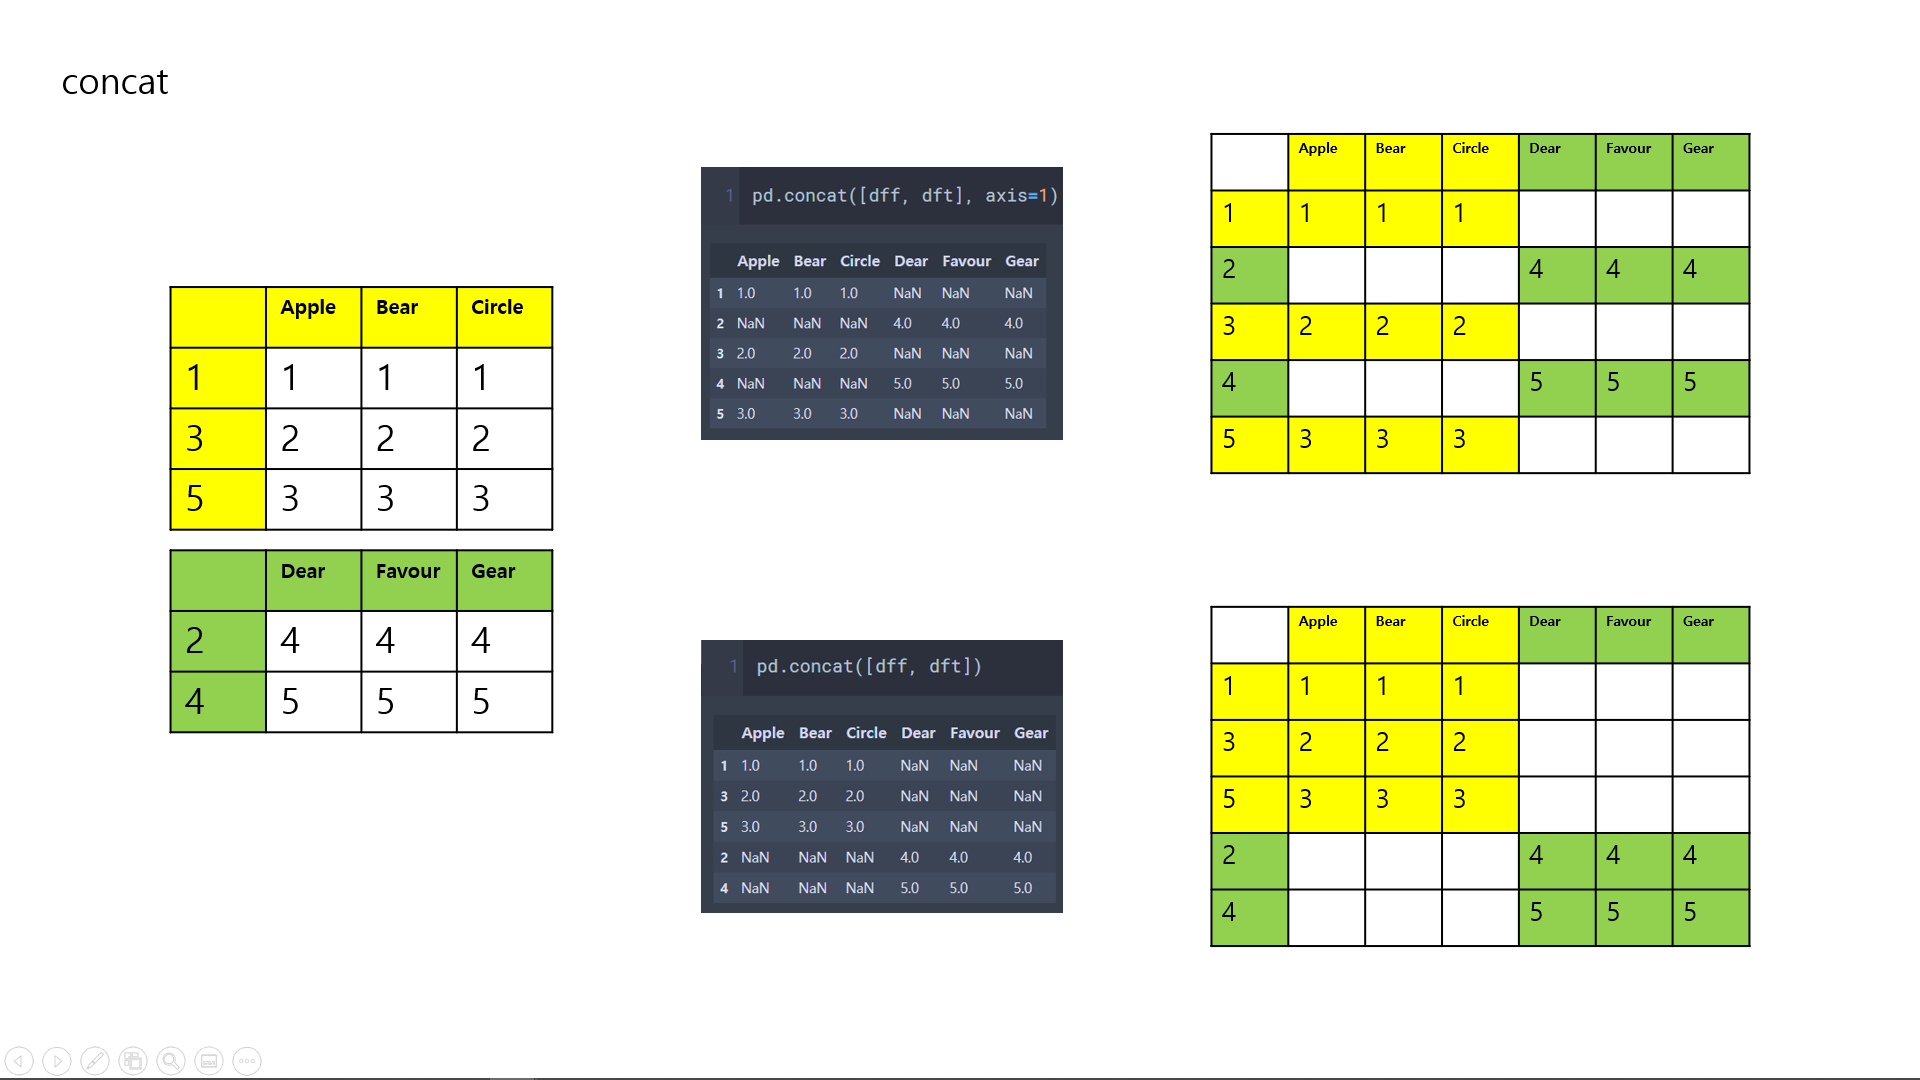

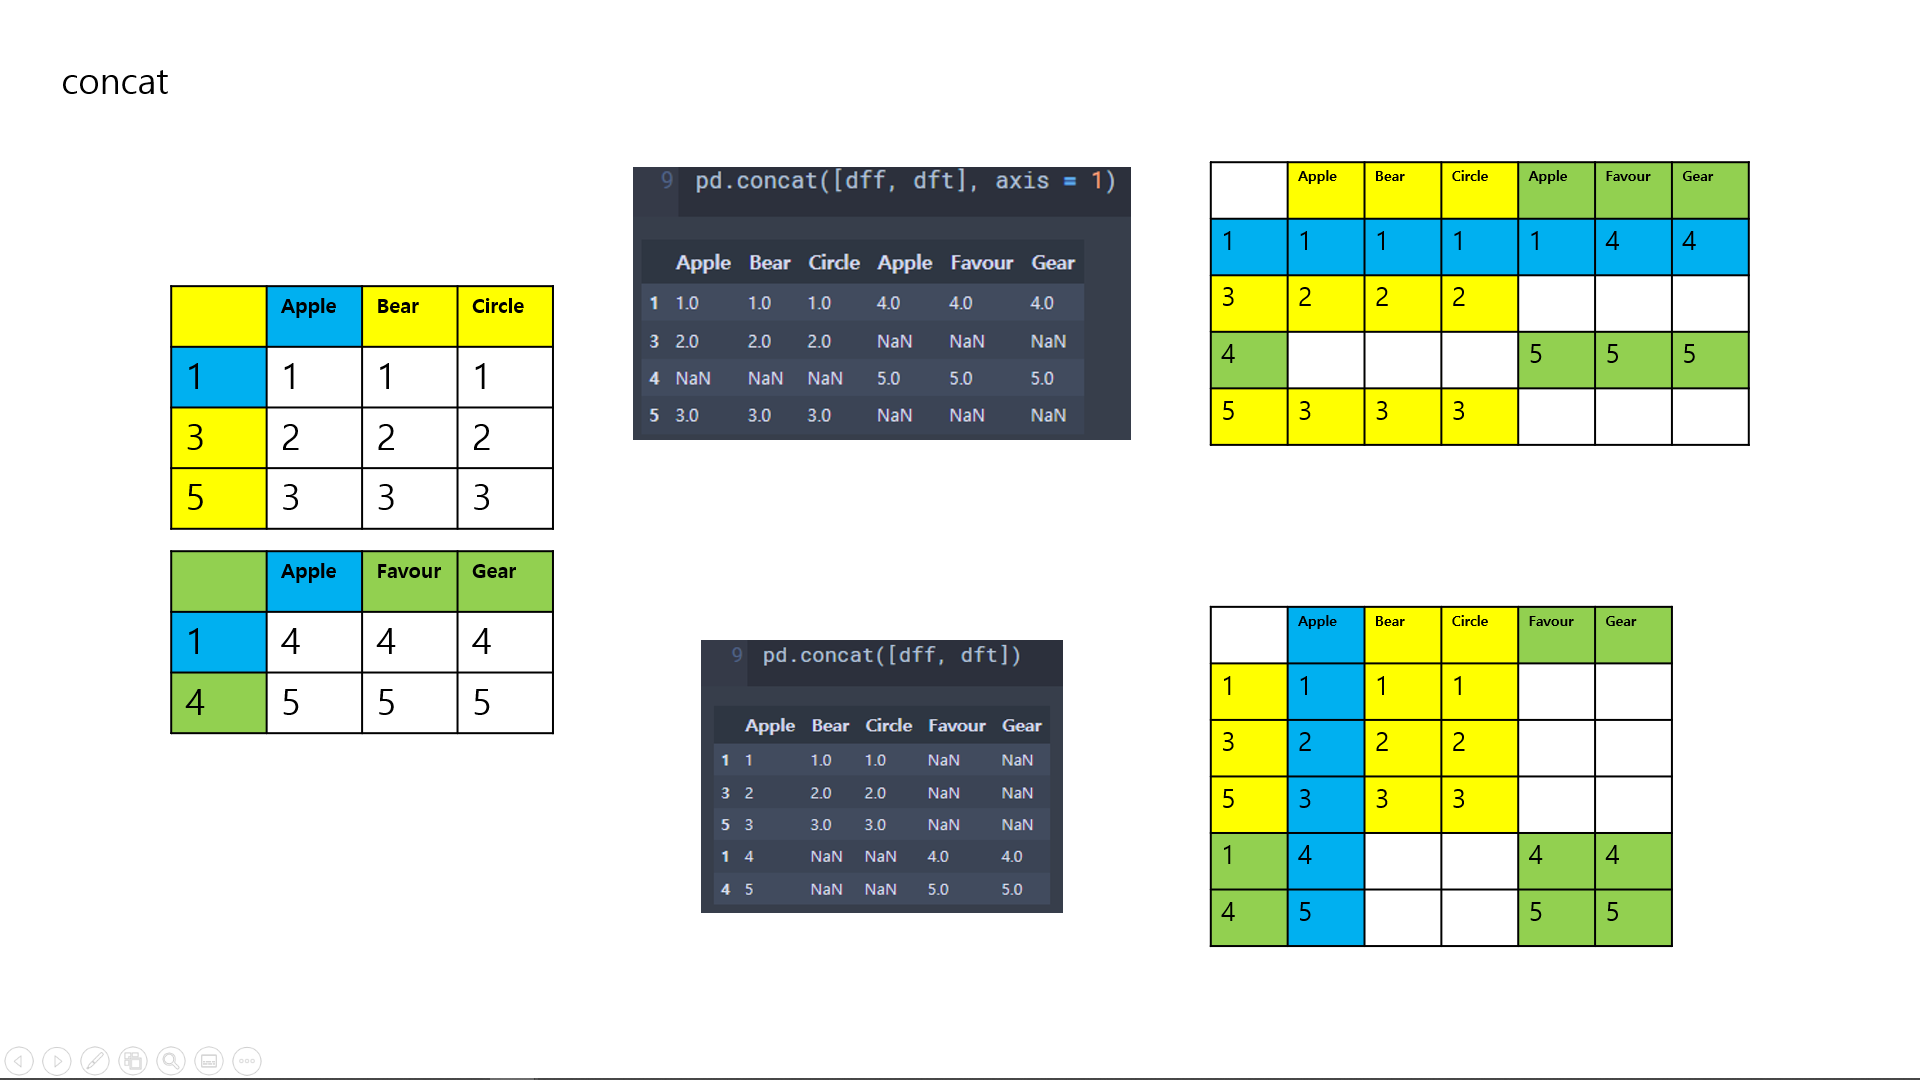

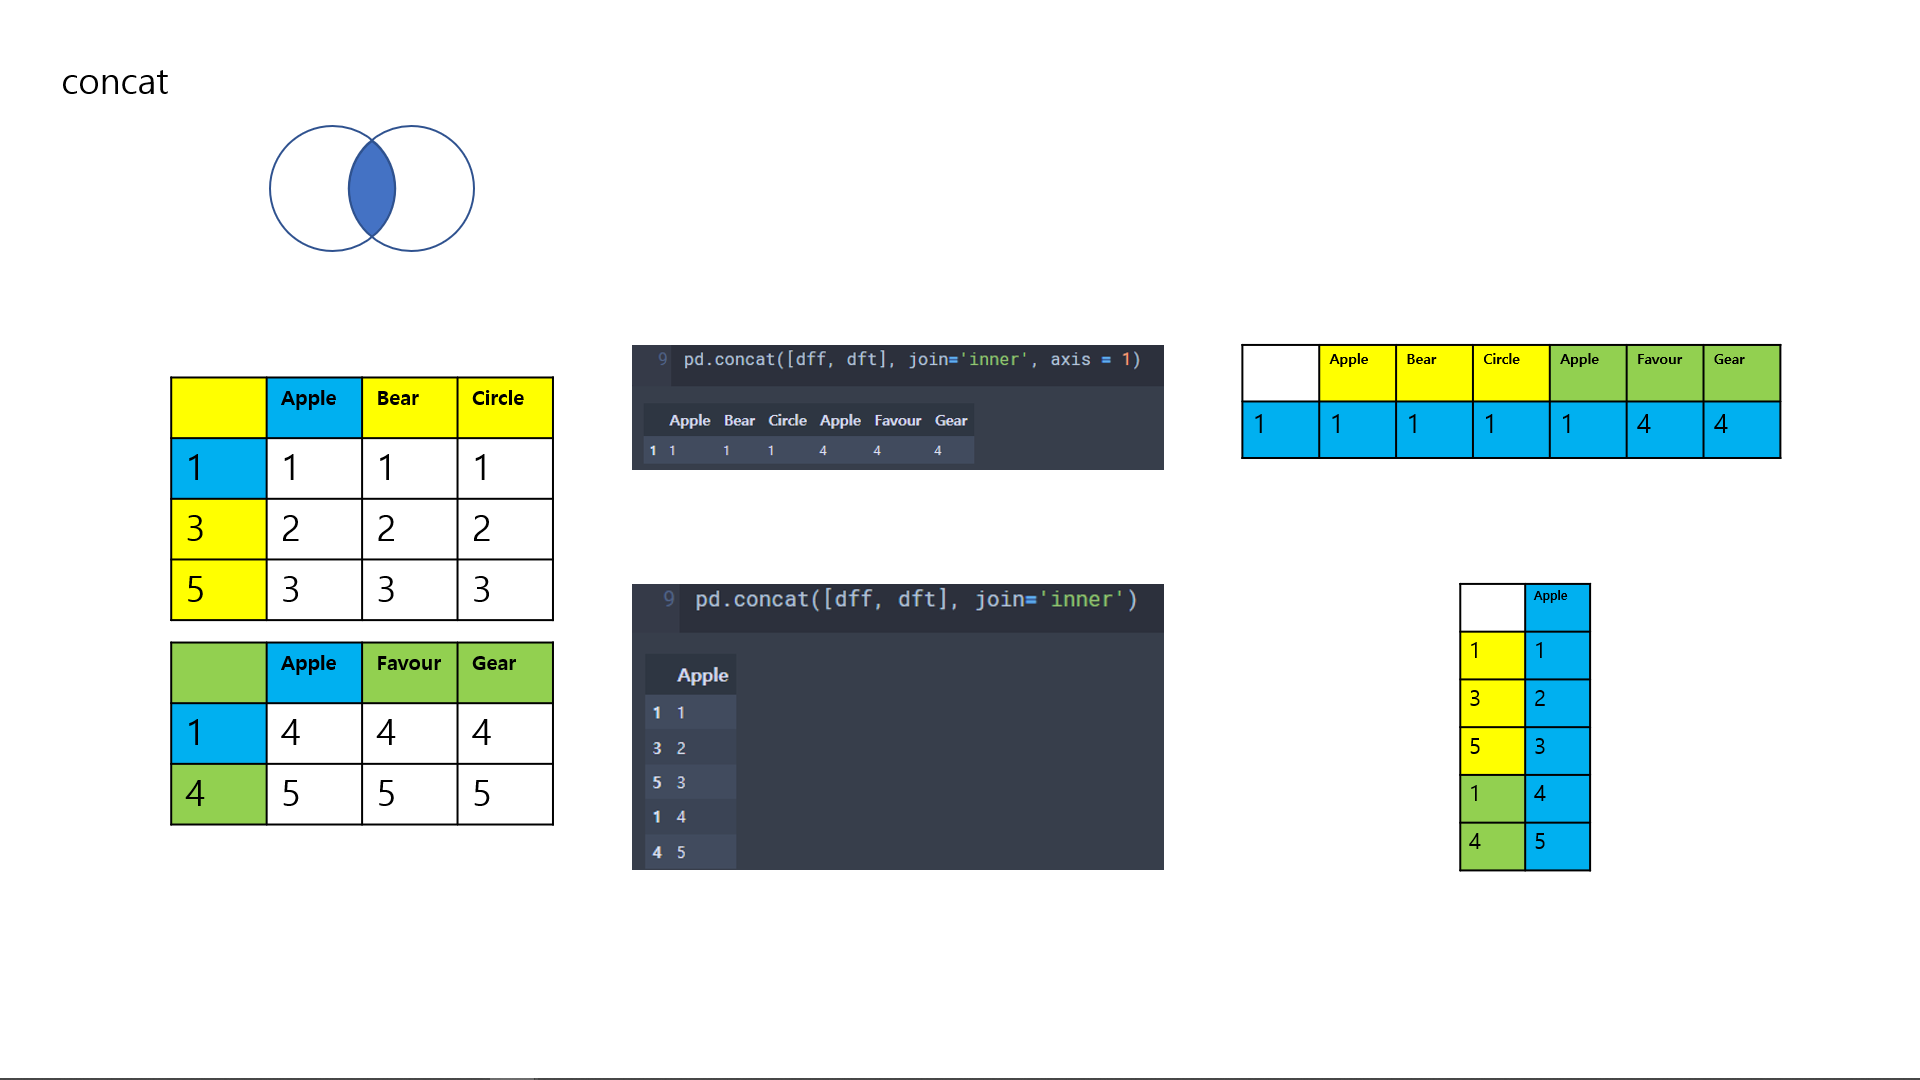

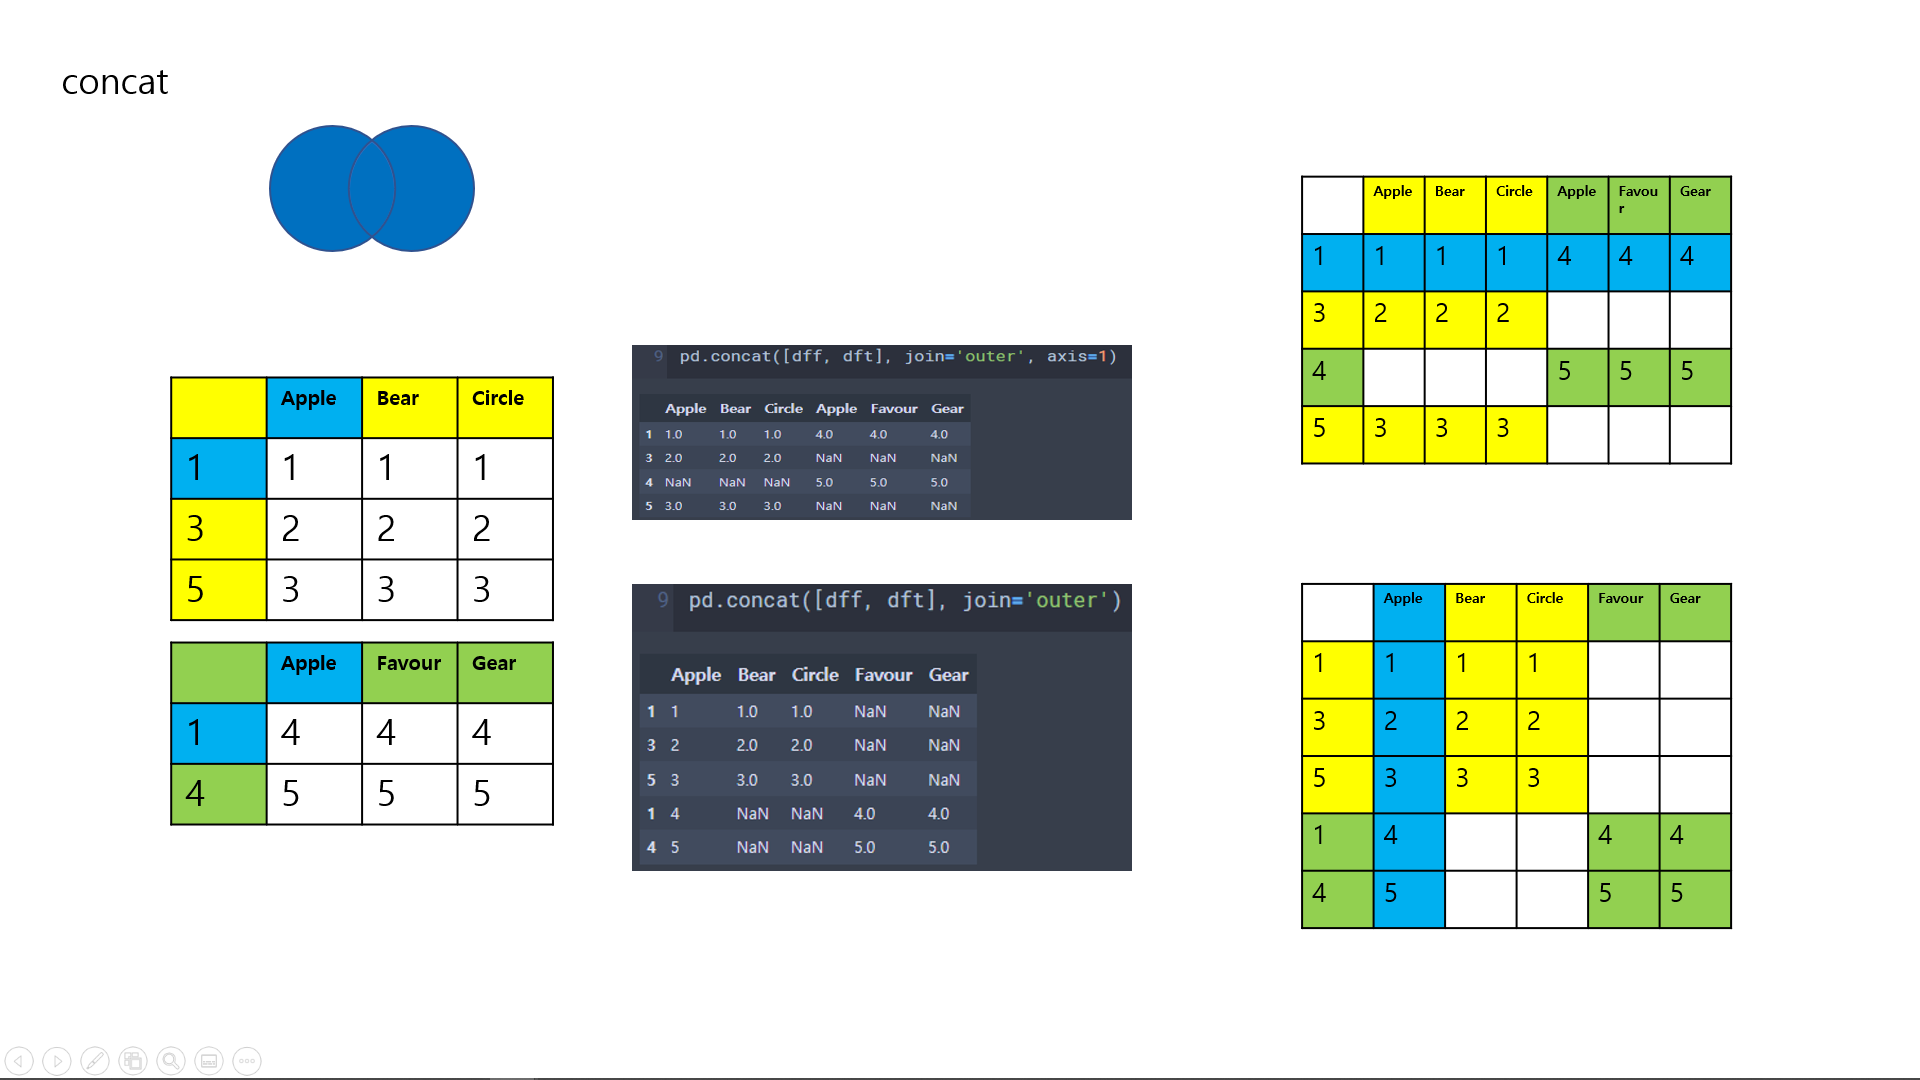

In [165]:
dff = pd.DataFrame({'Apple':[1, 2, 3],
                    'Bear':[1, 2, 3],
                    'Circle':[1, 2, 3]},
                    index = [1, 3, 5])
dft = pd.DataFrame({'Apple':[4, 5],
                    'Favour':[4, 5],
                    'Gear':[4, 5]},
                    index = [1, 4])
pd.concat([dff, dft], join='outer', axis=1)

,Apple,Bear,Circle,Apple,Favour,Gear
1,1.0,1.0,1.0,4.0,4.0,4.0
3,2.0,2.0,2.0,NaN,NaN,NaN
4,NaN,NaN,NaN,5.0,5.0,5.0
5,3.0,3.0,3.0,NaN,NaN,NaN


In [166]:
s1 = pd.Series(['a','b'], index = [1, 2])
s2 = pd.Series(['c','d'], index = [3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [167]:
def create_df(cols, idx):
    data = {c: [str(c.lower()) +str(i) for i in idx] for c in cols}
    return pd.DataFrame(data, idx)

In [168]:
df1 = create_df('AB',[1,2])
df1

,A,B
1,a1,b1
2,a2,b2


In [169]:
df2 = create_df('AB',[3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [170]:
pd.concat([df1,df2])
# Index의 순서에 따라 아래로 데이터 테이블이 붙음

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [171]:
df_1 = pd.DataFrame(np.random.randint(1, 9, (3, 3)), index=['Apple', 'Bannana','Circle'], columns=[1, 2, 3])
df_2 = pd.DataFrame(np.random.randint(10, 19, (3, 3)), index=['Doll','Elevator','Fine'], columns=[1, 2, 3])
pd.concat([df_1, df_2], axis=1)
# Index의 순서에 따라 아래로 데이터 테이블이 붙었으며, 테이블당 없는 컬럼에 대해서는 NaN값으로 반환함
# axis = 1: Index의 공통적인 요소를 찾아 테이블을 붙이겠다.

,1,2,3,1,2,3
Apple,4.0,1.0,7.0,NaN,NaN,NaN
Bannana,1.0,6.0,8.0,NaN,NaN,NaN
Circle,6.0,7.0,1.0,NaN,NaN,NaN
Doll,NaN,NaN,NaN,17.0,18.0,10.0
Elevator,NaN,NaN,NaN,13.0,16.0,12.0
Fine,NaN,NaN,NaN,18.0,11.0,16.0


In [172]:
pd.concat([df_1, df_2])
# axis = 0: column의 공통적인 요소를 찾아 테이블을 붙이겠다.

,1,2,3
Apple,4,1,7
Bannana,1,6,8
Circle,6,7,1
Doll,17,18,10
Elevator,13,16,12
Fine,18,11,16


In [173]:
df_1 = pd.DataFrame(np.random.randint(1, 9, (3, 3)), index=['Apple', 'Bannana','Circle'], columns=[1, 2, 3])
df_2 = pd.DataFrame(np.random.randint(10, 19, (3, 3)), index=['Doll','Elevator','Fine'], columns=[4, 5, 6])
pd.concat([df_1, df_2])
# Index의 순서에 따라 아래로 데이터 테이블이 붙었으며, 테이블당 없는 컬럼에 대해서는 NaN값으로 반환함

,1,2,3,4,5,6
Apple,8.0,8.0,1.0,NaN,NaN,NaN
Bannana,2.0,6.0,1.0,NaN,NaN,NaN
Circle,6.0,6.0,6.0,NaN,NaN,NaN
Doll,NaN,NaN,NaN,10.0,16.0,11.0
Elevator,NaN,NaN,NaN,10.0,12.0,11.0
Fine,NaN,NaN,NaN,13.0,18.0,16.0


In [174]:
df3 = create_df('AB',[0,1])
df3

,A,B
0,a0,b0
1,a1,b1


In [175]:
df4 = create_df('CD',[0,1])
df4

,C,D
0,c0,d0
1,c1,d1


In [176]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [177]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [178]:
df7 = create_df('AB', [0, 1])
df8 = create_df('AB', [2, 3])
pd.concat([df7, df8])

,A,B
0,a0,b0
1,a1,b1
2,a2,b2
3,a3,b3


In [179]:
pd.concat([df7, df8], axis =1)

,A,B,A,B
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
2,NaN,NaN,a2,b2
3,NaN,NaN,a3,b3


In [180]:
df_5 = pd.DataFrame({1:[1, 2, 3], 3:[4, 5, 6], 5:[7, 8, 9]},
                    index = [1, 2, 3])
df_6 = pd.DataFrame({1:[1, 3, 4], 2:[1, 1, 1], 4:[7, 8, 9]},
                    index = [1, 2, 3])
pd.concat([df_5, df_6])

,1,2,3,4,5
1,1,NaN,4.0,NaN,7.0
2,2,NaN,5.0,NaN,8.0
3,3,NaN,6.0,NaN,9.0
1,1,1.0,NaN,7.0,NaN
2,3,1.0,NaN,8.0,NaN
3,4,1.0,NaN,9.0,NaN


In [181]:
df_7 = pd.DataFrame({1:[1, 2, 3], 3:[4, 5, 6], 5:[7, 8, 9]})
df_8 = pd.DataFrame({2:[1, 1, 1], 4:[7, 8, 9], 6:[8, 9, 0]})
pd.concat([df_7, df_8])

,1,2,3,4,5,6
0,1.0,NaN,4.0,NaN,7.0,NaN
1,2.0,NaN,5.0,NaN,8.0,NaN
2,3.0,NaN,6.0,NaN,9.0,NaN
0,NaN,1.0,NaN,7.0,NaN,8.0
1,NaN,1.0,NaN,8.0,NaN,9.0
2,NaN,1.0,NaN,9.0,NaN,0.0


In [182]:
pd.concat([df_7, df_8], axis=1).sort_index(axis=1)

,1,2,3,4,5,6
0,1,1,4,7,7,8
1,2,1,5,8,8,9
2,3,1,6,9,9,0


In [183]:
pd.concat([df_5, df_6], axis=1).sort_index(axis=1)

,1,1,2,3,4,5
1,1,1,1,4,7,7
2,2,3,1,5,8,8
3,3,4,1,6,9,9


concat은 하나의 공통된 기준을 가지고 테이블을 합치는 것이다.  
만약 공통된 기준이 존재하지 않으면 NaN값으로 채워진다.  
공통된 기준은 axis를 기준으로 하며, 기본값은 axis=0다.<br>
<br>
axis=0: 두 테이블의 컬럼을 기준으로 합친다.  
axis=1: 두 테이블의 인덱스를 기준으로 합친다.

In [184]:
pd.concat([df_5, df_6], join='inner')

,1
1,1
2,2
3,3
1,1
2,3
3,4


In [185]:
pd.concat([df_5, df_6], join='inner', axis=1)

,1,3,5,1,2,4
1,1,4,7,1,1,7
2,2,5,8,3,1,8
3,3,6,9,4,1,9


In [186]:
df5 = create_df('ABC',[1, 2])
df6 = create_df('BCD',[3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [187]:
pd.concat([df5, df6],join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


## 병합과 조인
merge는 공통된 컬럼을 기준으로 공통된 값을 기준으로 두 테이블을 병합한다.  
주의점: 기준이 된 컬럼의 공통된 값으로 인하여 테이블의 크기가 변화할 수 있다!!

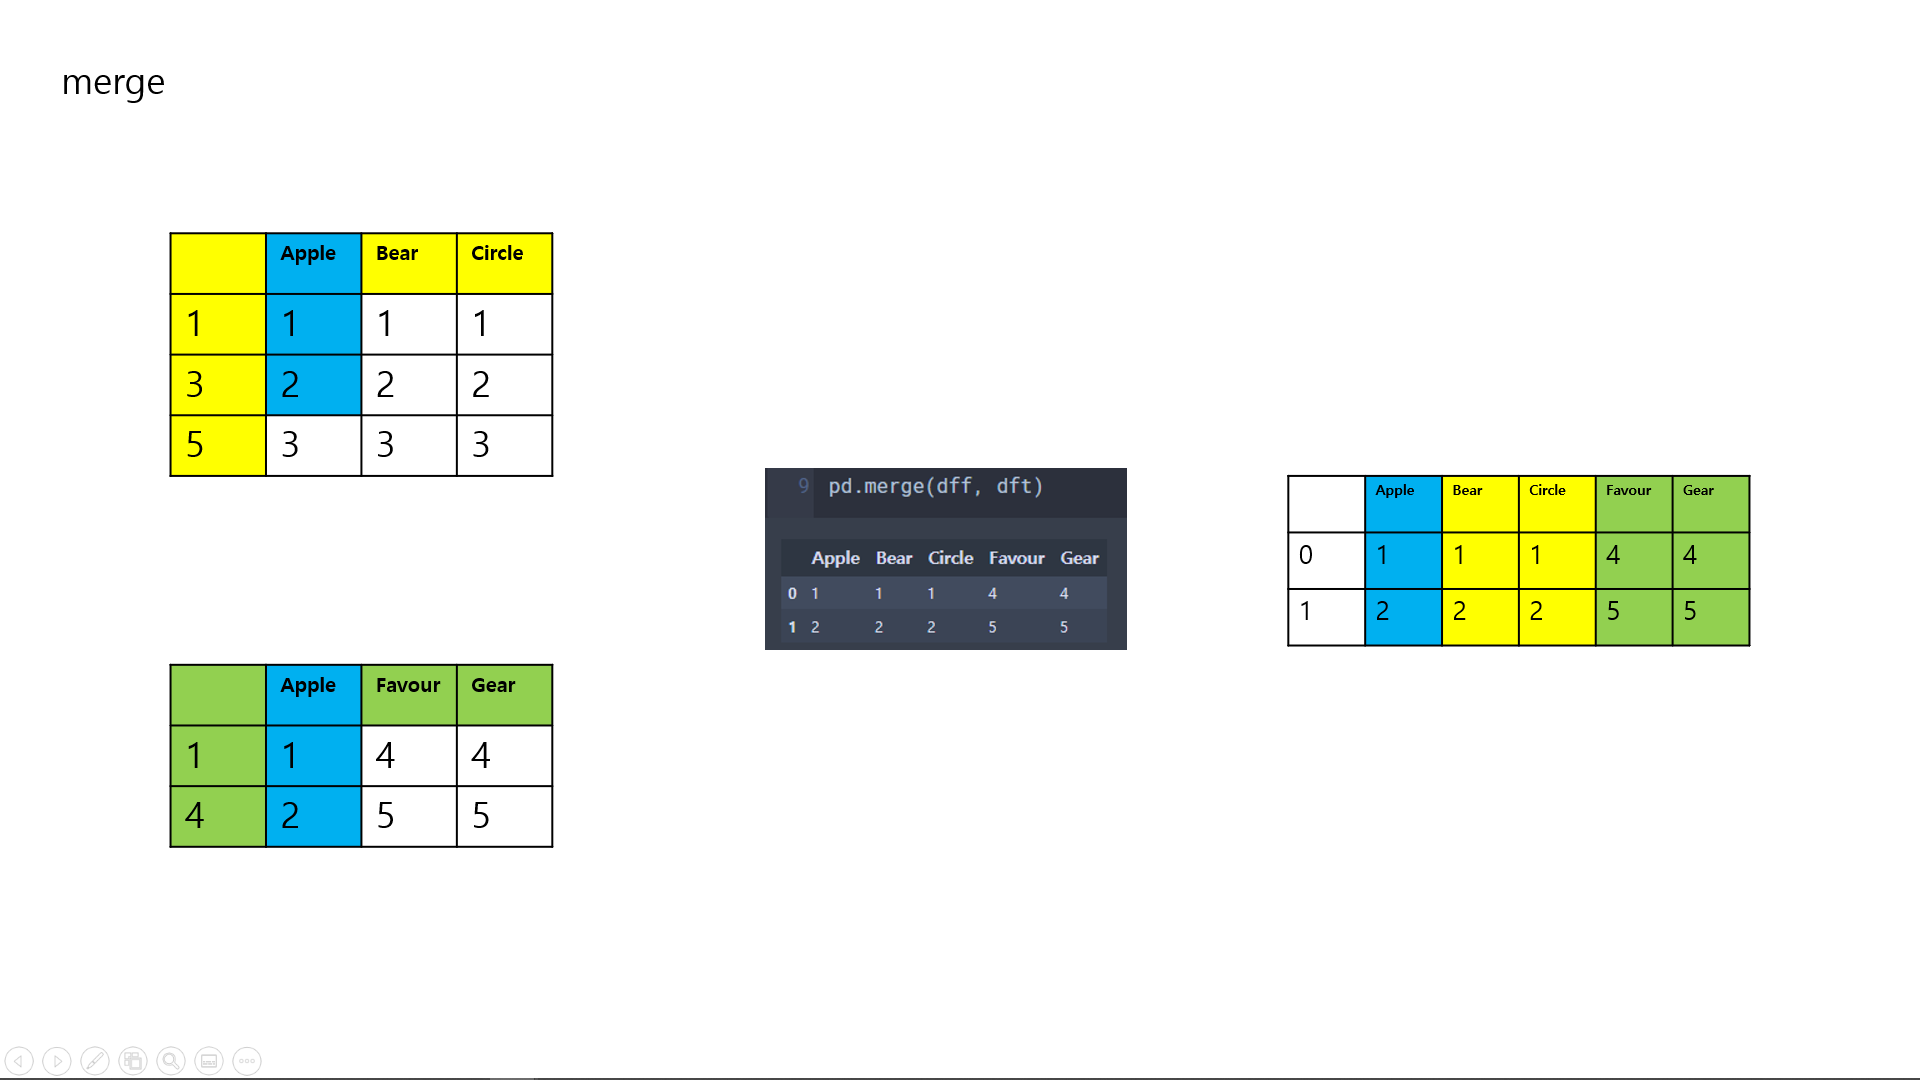

In [188]:
dff = pd.DataFrame({'Apple':[1, 2, 3],
                    'Bear':[1, 2, 3],
                    'Circle':[1, 2, 3]},
                    index = [1, 3, 5])
dft = pd.DataFrame({'Apple':[1, 2],
                    'Favour':[4, 5],
                    'Gear':[4, 5]},
                    index = [1, 4])
pd.merge(dff, dft)

,Apple,Bear,Circle,Favour,Gear
0,1,1,1,4,4
1,2,2,2,5,5


In [189]:
df1 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '학과':['경영학과','교육학과','컴퓨터학과','통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [190]:
df2 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '입학년도':[2012, 2016, 2019, 2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2019
3,김유신,2020


In [191]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [192]:
df_3 = pd.concat([df1, df2])
df_3

,학생,학과,입학년도
0,홍길동,경영학과,NaN
1,이순신,교육학과,NaN
2,임꺽정,컴퓨터학과,NaN
3,김유신,통계학과,NaN
0,홍길동,NaN,2012.0
1,이순신,NaN,2016.0
2,임꺽정,NaN,2019.0
3,김유신,NaN,2020.0


In [193]:
df4 = pd.DataFrame({'학과':['경영학과','교육학과','컴퓨터학과','통계학과'],
                    '학과장':['황희','장영실','안창호','정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [194]:
pd.merge(df3, df4)
# df3와 df4에 '학과'라는 공통된 컬럼이 있었기 때문에 merge가 가능

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [195]:
pd.concat([df3, df4], join='inner', axis=1)

,학생,학과,입학년도,학과,학과장
0,홍길동,경영학과,2012,경영학과,황희
1,이순신,교육학과,2016,교육학과,장영실
2,임꺽정,컴퓨터학과,2019,컴퓨터학과,안창호
3,김유신,통계학과,2020,통계학과,정약용


In [196]:
df5 = pd.DataFrame({'학과':['경영학과','교육학과','교육학과','컴퓨터학과','컴퓨터학과','통계학과'],
                    '과목':['경영학개론','기초수학','물리학','프로그래밍','운영체제','확률론']})
df5

,학과,과목
0,경영학과,경영학개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [197]:
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [198]:
df5

,학과,과목
0,경영학과,경영학개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [199]:
pd.merge(df1, df5)
# merge를 할 수 있는 조건은 공통된 column이 존재해야 한다는 것이다.
# df1과 df5의 공통 column은 '학과' column이다.
# df5는 학과를 기준으로 6개의 정보가 있지만
# df1은 학과를 기준으로 4개의 정보밖에 없다.
# concat과 달리 공통된 column에 대한 정보를 합집합 개념으로 모두 포함하여
# 두 테이블을 합친다.

,학생,학과,과목
0,홍길동,경영학과,경영학개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


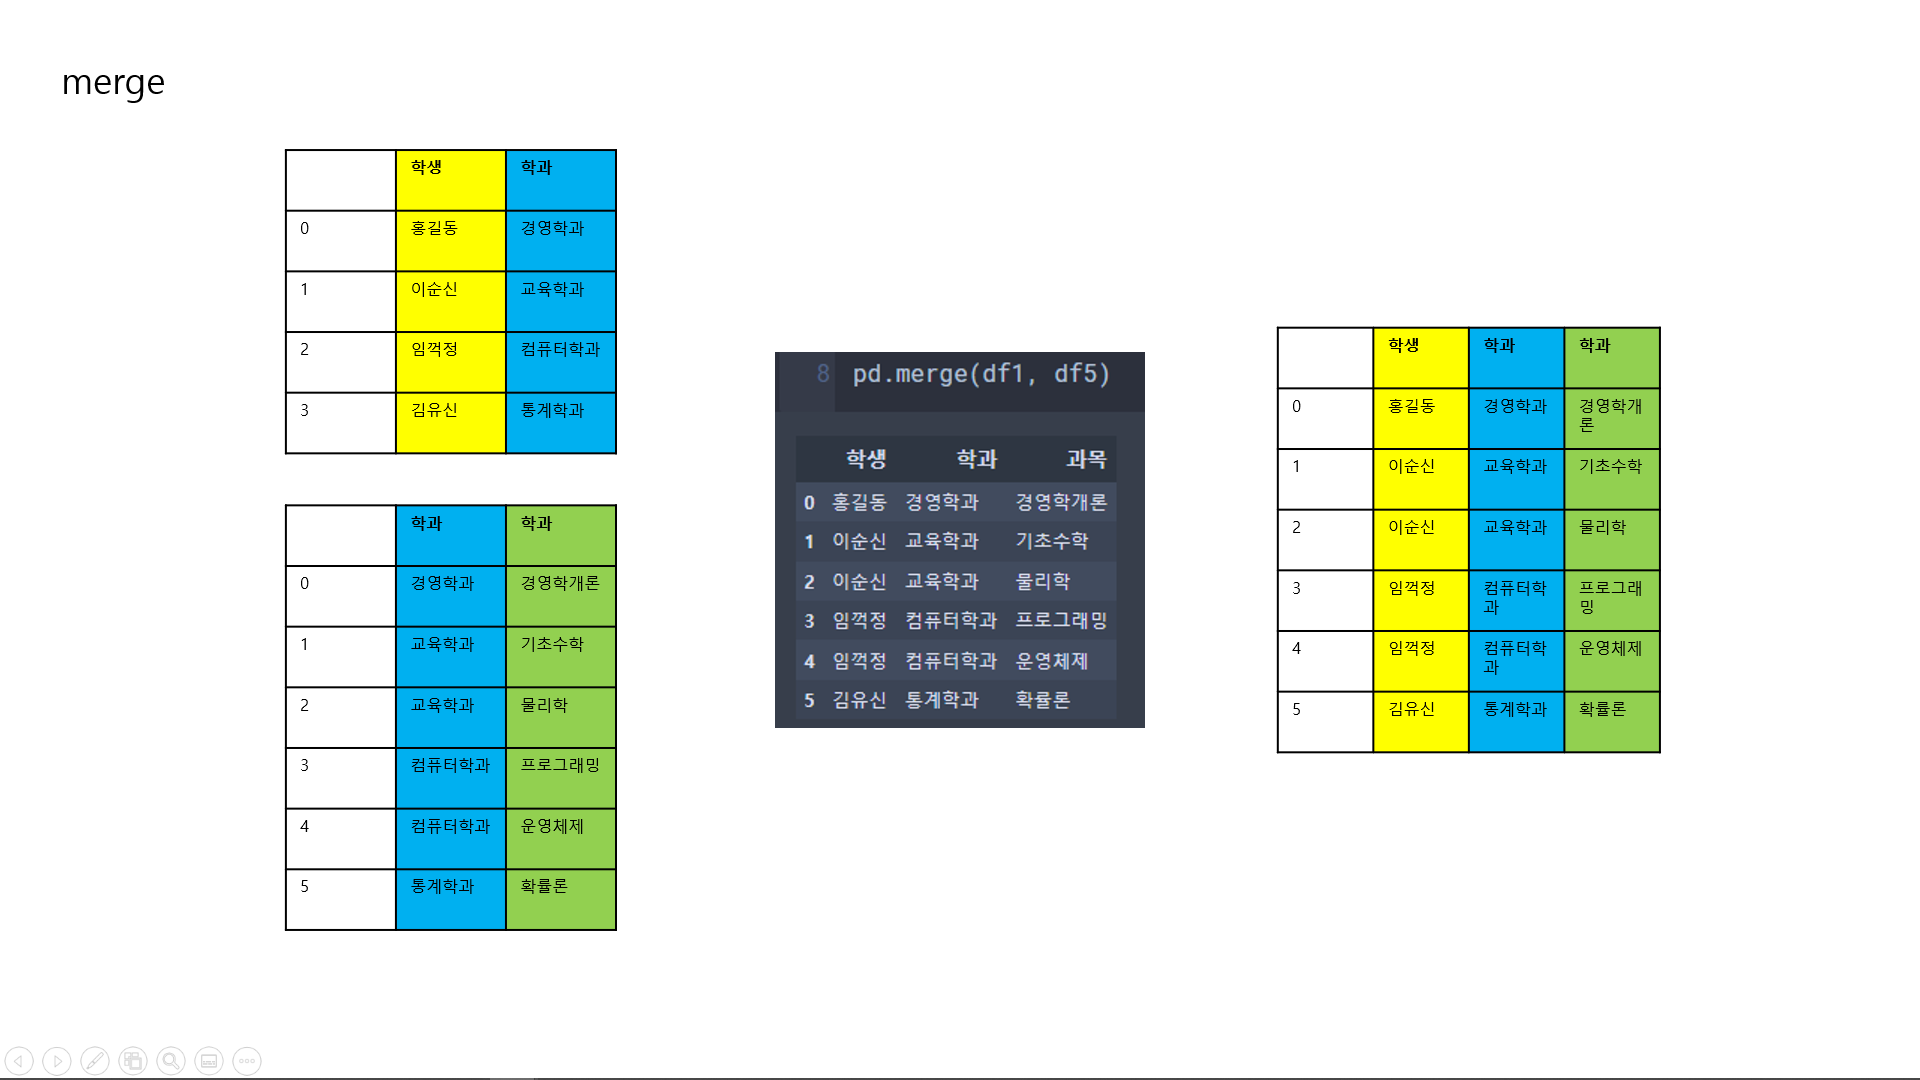

In [200]:
pd.concat([df1, df5])

,학생,학과,과목
0,홍길동,경영학과,NaN
1,이순신,교육학과,NaN
2,임꺽정,컴퓨터학과,NaN
3,김유신,통계학과,NaN
0,NaN,경영학과,경영학개론
1,NaN,교육학과,기초수학
2,NaN,교육학과,물리학
3,NaN,컴퓨터학과,프로그래밍
4,NaN,컴퓨터학과,운영체제
5,NaN,통계학과,확률론


In [201]:
pd.merge(df1, df5, on='학과')

,학생,학과,과목
0,홍길동,경영학과,경영학개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [202]:
pd.merge(df1, df2)

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [203]:
df6 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                    '성적':['A','A+','B','A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [204]:
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


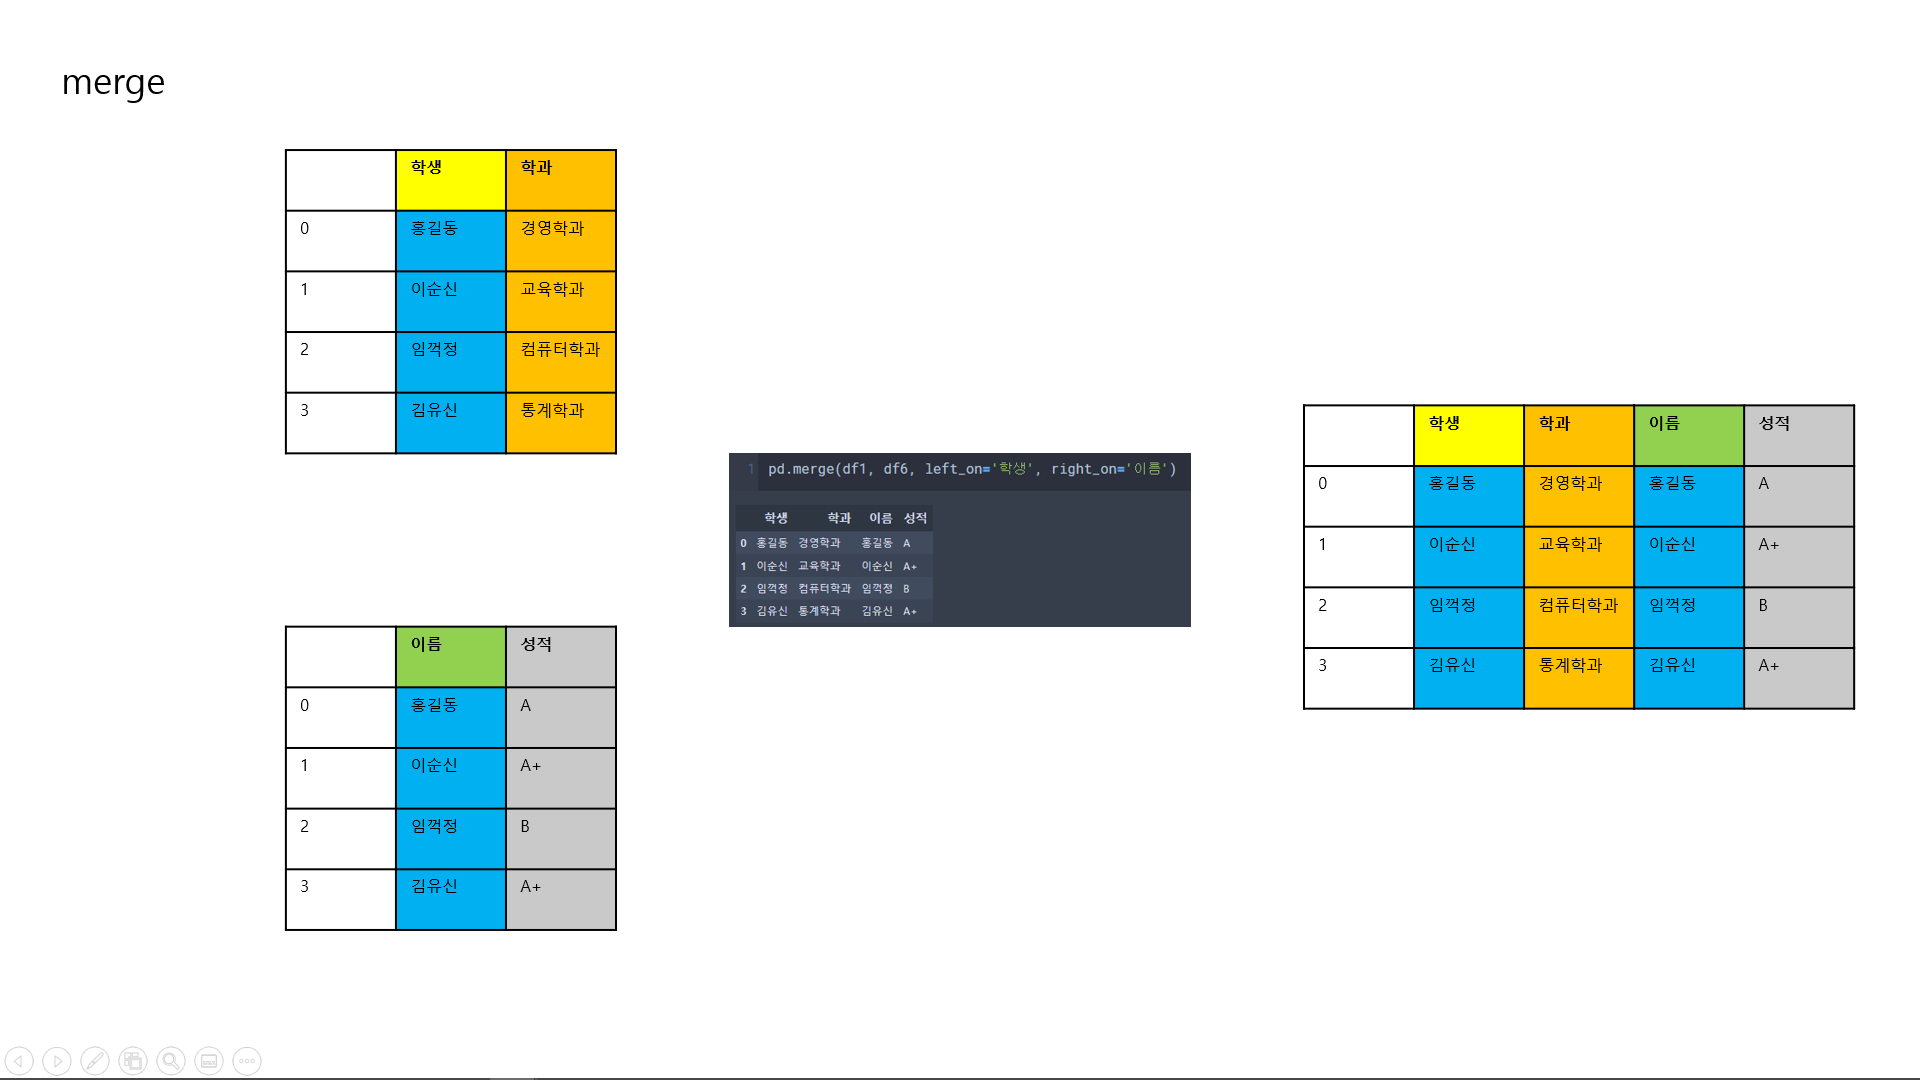

In [205]:
pd.merge(df1, df6, left_on='학생', right_on='이름')
# 같은 값이 존재하지만 columns명이 다를 때 left_on과 right_on을 써서 강제적으로 붙여줄 수 있다.

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


### 공통된 index가 있는 두 테이블을 합치기
공통된 index가 있는 두 테이블을 합치는 방법엔 두가지 방법이 있다.  
1. pd.merge에서 left_index=True, right_on='colunm명'을 쓰는 방법과  
2. table1.join(table2)가 있다.  
  
그러나 이 두 가지 방법 모두 공통된 index가 존재하여야 한다.

In [206]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [207]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [208]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2019
김유신,2020


In [209]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [210]:
book = pd.DataFrame({'제목':['기계학습','현대통계학', '알고리즘 입문', '태블로'],
                     '가격':[50000, 15000, 30000, 12000]})
book

,제목,가격
0,기계학습,50000
1,현대통계학,15000
2,알고리즘 입문,30000
3,태블로,12000


In [211]:
publisher = pd.DataFrame({'제목':['기계학습','현대통계학', '알고리즘 입문', '태블로'],
                          '출판사':['한빛아카데미','다산출판사','이지스퍼블리싱','태블로']})
publisher

,제목,출판사
0,기계학습,한빛아카데미
1,현대통계학,다산출판사
2,알고리즘 입문,이지스퍼블리싱
3,태블로,태블로


In [212]:
book1 = book.set_index('제목')
book1

,가격
제목,
기계학습,50000
현대통계학,15000
알고리즘 입문,30000
태블로,12000


In [213]:
publisher2 = publisher.set_index('제목')
publisher2

,출판사
제목,
기계학습,한빛아카데미
현대통계학,다산출판사
알고리즘 입문,이지스퍼블리싱
태블로,태블로


In [214]:
pd.merge(book1, publisher2, left_index=True, right_on='제목')

,가격,출판사
제목,,
기계학습,50000,한빛아카데미
현대통계학,15000,다산출판사
알고리즘 입문,30000,이지스퍼블리싱
태블로,12000,태블로


In [215]:
running_score = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                              '달리기 기록':[9.14, 9.06, 8.94, 9.65, 8.99]})
r_i = running_score.set_index('학생')
r_i

,달리기 기록
학생,
철수,9.14
바둑이,9.06
강철,8.94
철민,9.65
민수,8.99


In [216]:
metal_pole = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                           '철봉 기록':[15.77, 17.88, 14.22, 16.41, 21.19]})
m_i = metal_pole.set_index('학생')
m_i

,철봉 기록
학생,
철수,15.77
바둑이,17.88
강철,14.22
철민,16.41
민수,21.19


In [217]:
football_score = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                               '골인 기록':[5, 3, 4, 5, 1]})
f_i = football_score.set_index('학생')
f_i

,골인 기록
학생,
철수,5
바둑이,3
강철,4
철민,5
민수,1


In [218]:
t_i = pd.merge(r_i, m_i, left_index=True, right_on='학생')
t_i

,달리기 기록,철봉 기록
학생,,
철수,9.14,15.77
바둑이,9.06,17.88
강철,8.94,14.22
철민,9.65,16.41
민수,8.99,21.19


In [219]:
r_i.join(m_i)

,달리기 기록,철봉 기록
학생,,
철수,9.14,15.77
바둑이,9.06,17.88
강철,8.94,14.22
철민,9.65,16.41
민수,8.99,21.19


In [220]:
t_t = pd.merge(t_i, f_i, left_index=True, right_on='학생')
t_t

,달리기 기록,철봉 기록,골인 기록
학생,,,
철수,9.14,15.77,5
바둑이,9.06,17.88,3
강철,8.94,14.22,4
철민,9.65,16.41,5
민수,8.99,21.19,1


In [221]:
t_i.join(f_i)

,달리기 기록,철봉 기록,골인 기록
학생,,,
철수,9.14,15.77,5
바둑이,9.06,17.88,3
강철,8.94,14.22,4
철민,9.65,16.41,5
민수,8.99,21.19,1


In [222]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [223]:
pd.merge(mdf1, df6, left_index = True, right_on='이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,A+


In [224]:
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [225]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


### inner /  outer join

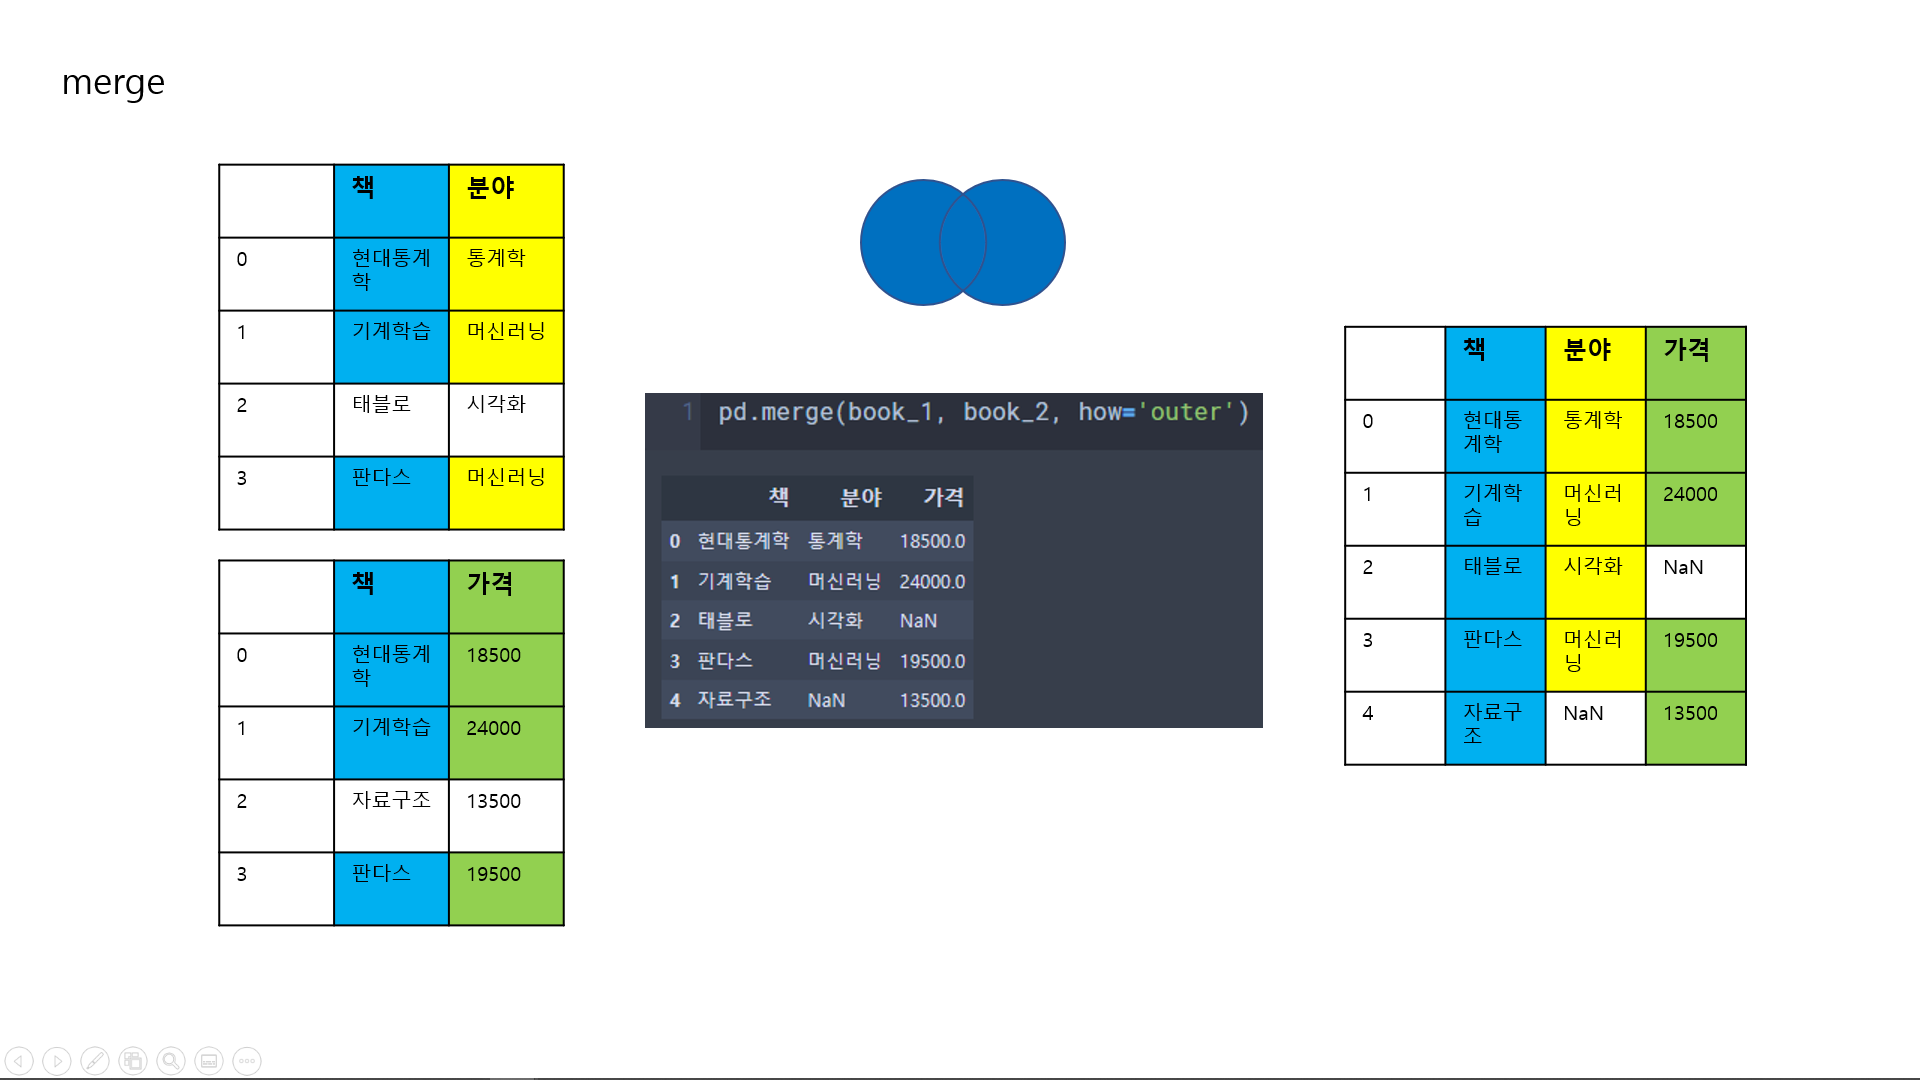

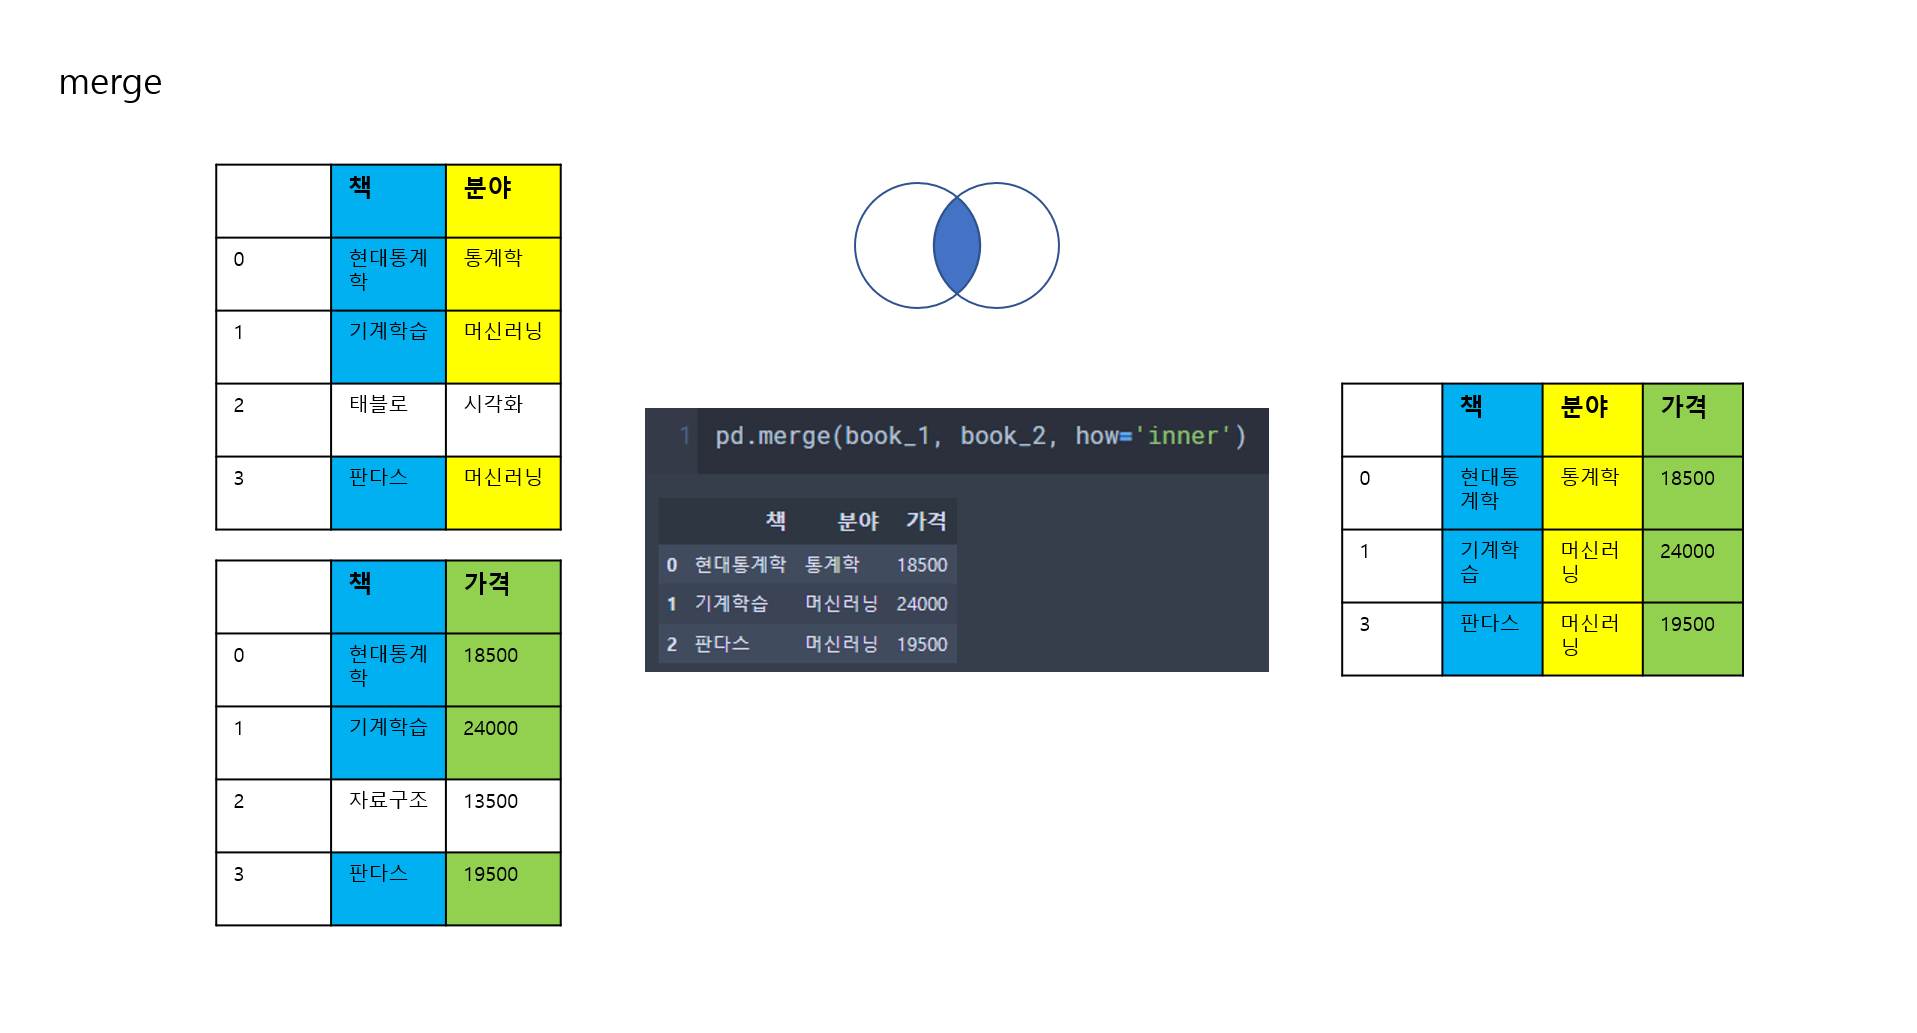

In [226]:
df7 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정'],
                    '주문음식':['햄버거','피자','짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [227]:
df8 = pd.DataFrame({'이름':['홍길동','이순신','김유신'],
                    '주문음료':['콜라','사이다','커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [228]:
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [229]:
pd.merge(df7, df8, how='inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [230]:
pd.merge(df7, df8, how='outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [231]:
pd.concat([df7, df8])

,이름,주문음식,주문음료
0,홍길동,햄버거,NaN
1,이순신,피자,NaN
2,임꺽정,짜장면,NaN
0,홍길동,NaN,콜라
1,이순신,NaN,사이다
2,김유신,NaN,커피


In [232]:
book_1 = pd.DataFrame({'책':['현대통계학','기계학습','태블로','판다스'],
                       '분야':['통계학','머신러닝','시각화','머신러닝']})
book_1

,책,분야
0,현대통계학,통계학
1,기계학습,머신러닝
2,태블로,시각화
3,판다스,머신러닝


In [233]:
book_2 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '가격':[18500, 24000, 13500, 19500]})
book_2

,책,가격
0,현대통계학,18500
1,기계학습,24000
2,자료구조,13500
3,판다스,19500


In [234]:
pd.merge(book_1, book_2, how='inner')

,책,분야,가격
0,현대통계학,통계학,18500
1,기계학습,머신러닝,24000
2,판다스,머신러닝,19500


In [235]:
pd.merge(book_1, book_2, how='outer')

,책,분야,가격
0,현대통계학,통계학,18500.0
1,기계학습,머신러닝,24000.0
2,태블로,시각화,NaN
3,판다스,머신러닝,19500.0
4,자료구조,NaN,13500.0


### left / right 

In [236]:
pd.merge(book_1, book_2, how='left')

,책,분야,가격
0,현대통계학,통계학,18500.0
1,기계학습,머신러닝,24000.0
2,태블로,시각화,NaN
3,판다스,머신러닝,19500.0


In [237]:
pd.merge(book_1, book_2, how='right')

,책,분야,가격
0,현대통계학,통계학,18500
1,기계학습,머신러닝,24000
2,자료구조,NaN,13500
3,판다스,머신러닝,19500


In [238]:
pd.merge(df7,df8, how='left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [239]:
pd.merge(df7, df8, how='right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


### on / suffixes

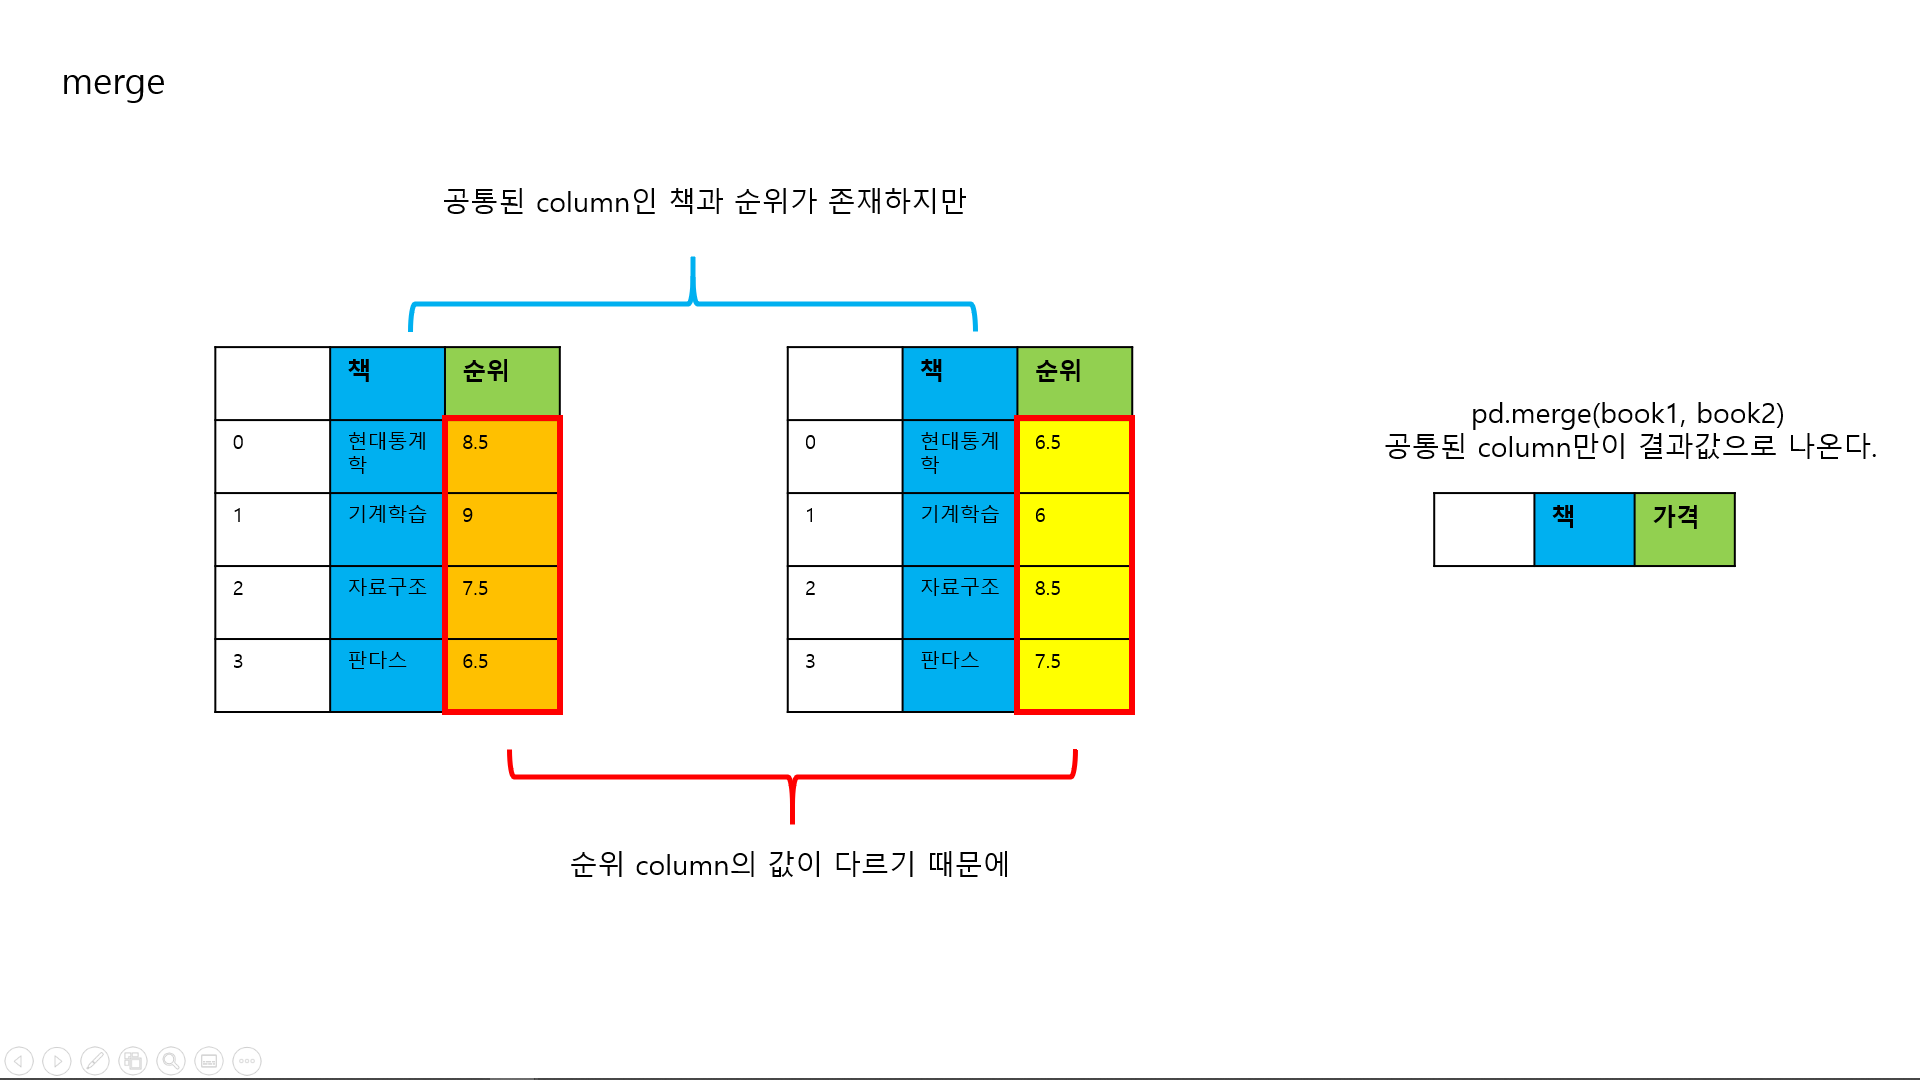

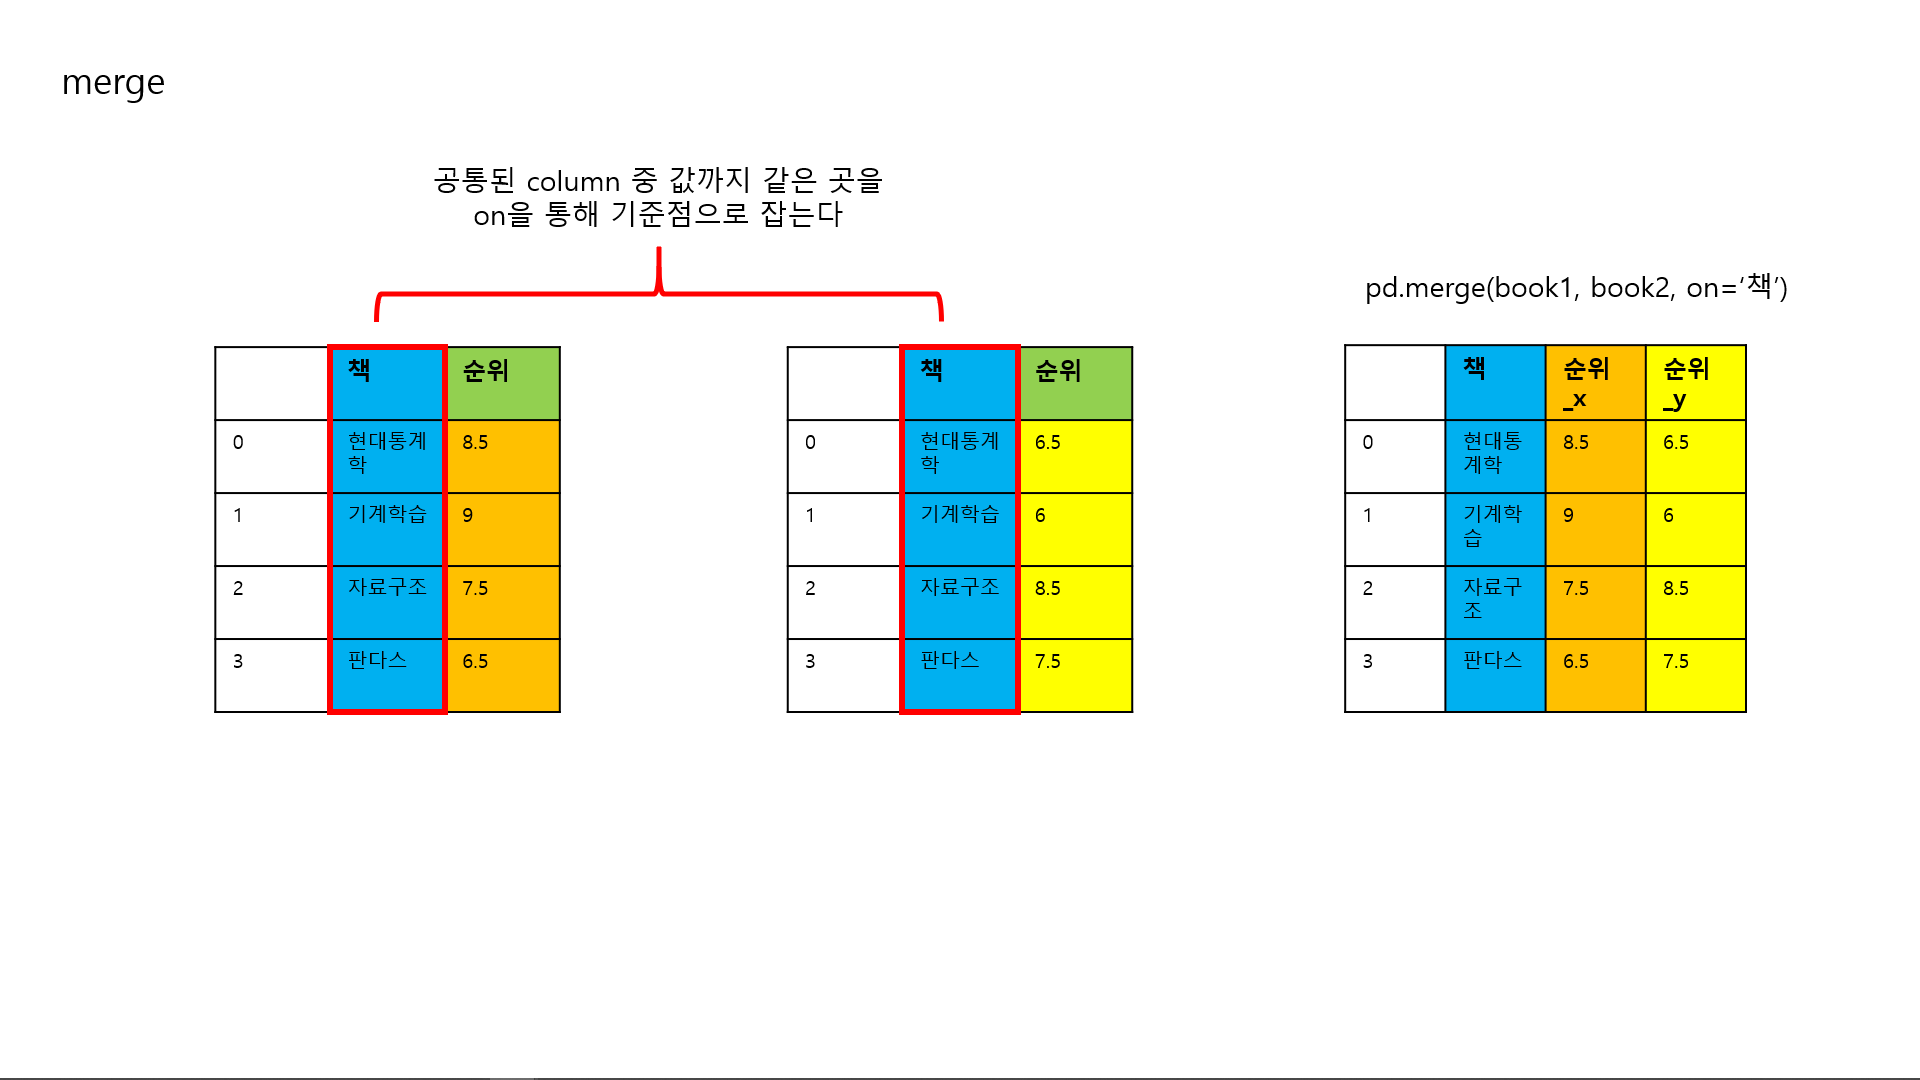

In [240]:
df9 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                    '순위':[3,2,4,1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [241]:
df10 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                     '순위':[4, 1, 3, 2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임꺽정,3
3,김유신,2


In [242]:
pd.merge(df9, df10, on='이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [243]:
pd.merge(df9, df10, on='이름', suffixes=['_인기','_성적'])

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [244]:
book_3 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '순위':[6.5, 6, 8.5, 7.5]})
book_3

,책,순위
0,현대통계학,6.5
1,기계학습,6.0
2,자료구조,8.5
3,판다스,7.5


In [245]:
book_4 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '순위':[8.5, 9, 7.5, 6.5]})
book_4

,책,순위
0,현대통계학,8.5
1,기계학습,9.0
2,자료구조,7.5
3,판다스,6.5


In [246]:
pd.merge(book_3, book_4, on='책')

,책,순위_x,순위_y
0,현대통계학,6.5,8.5
1,기계학습,6.0,9.0
2,자료구조,8.5,7.5
3,판다스,7.5,6.5


In [247]:
pd.merge(book_3, book_4, on='책', suffixes=['_독자', '_전문가'])

,책,순위_독자,순위_전문가
0,현대통계학,6.5,8.5
1,기계학습,6.0,9.0
2,자료구조,8.5,7.5
3,판다스,7.5,6.5


## 데이터 재구조화

### stack( ), unstack( )
- stack: 위에서 아래로 길게, 높게 쌓는 것
- unstack: 왼쪽에서 오른쪽으로 넓게 쌓는 것

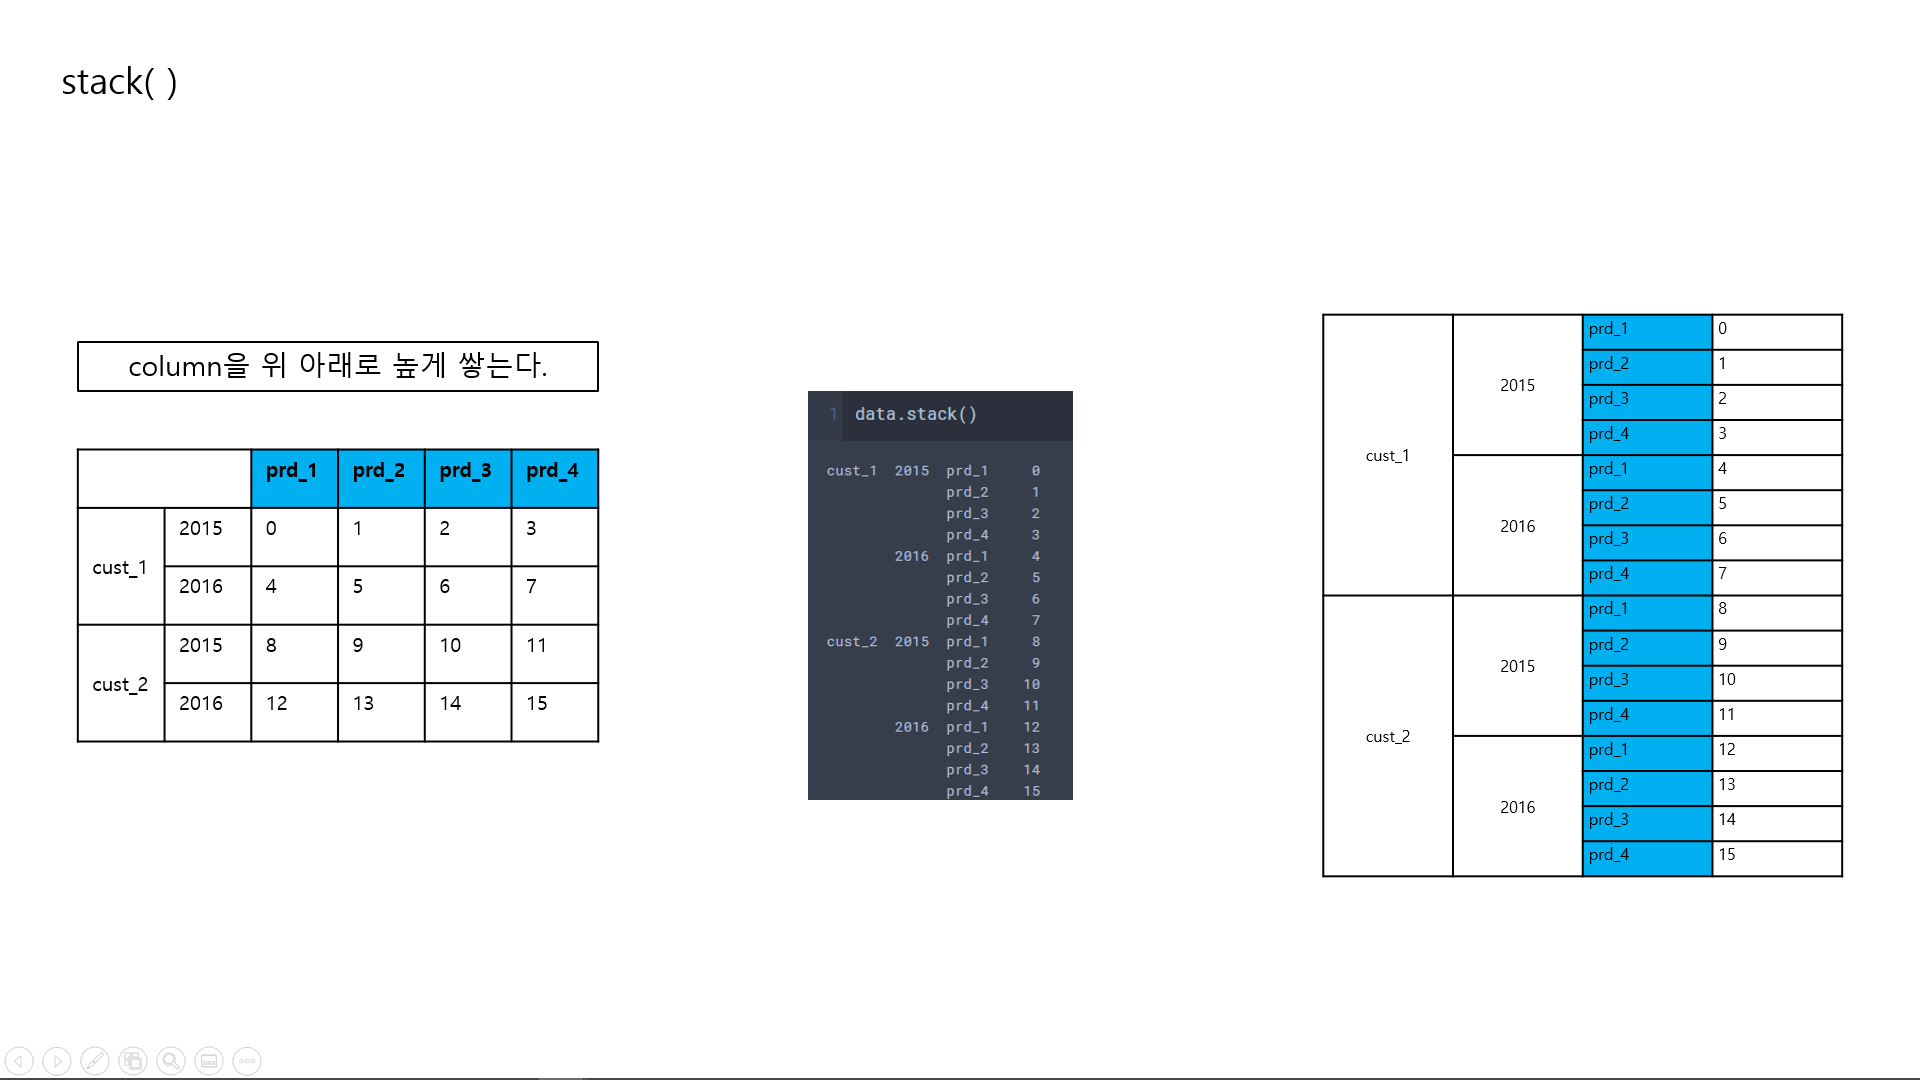

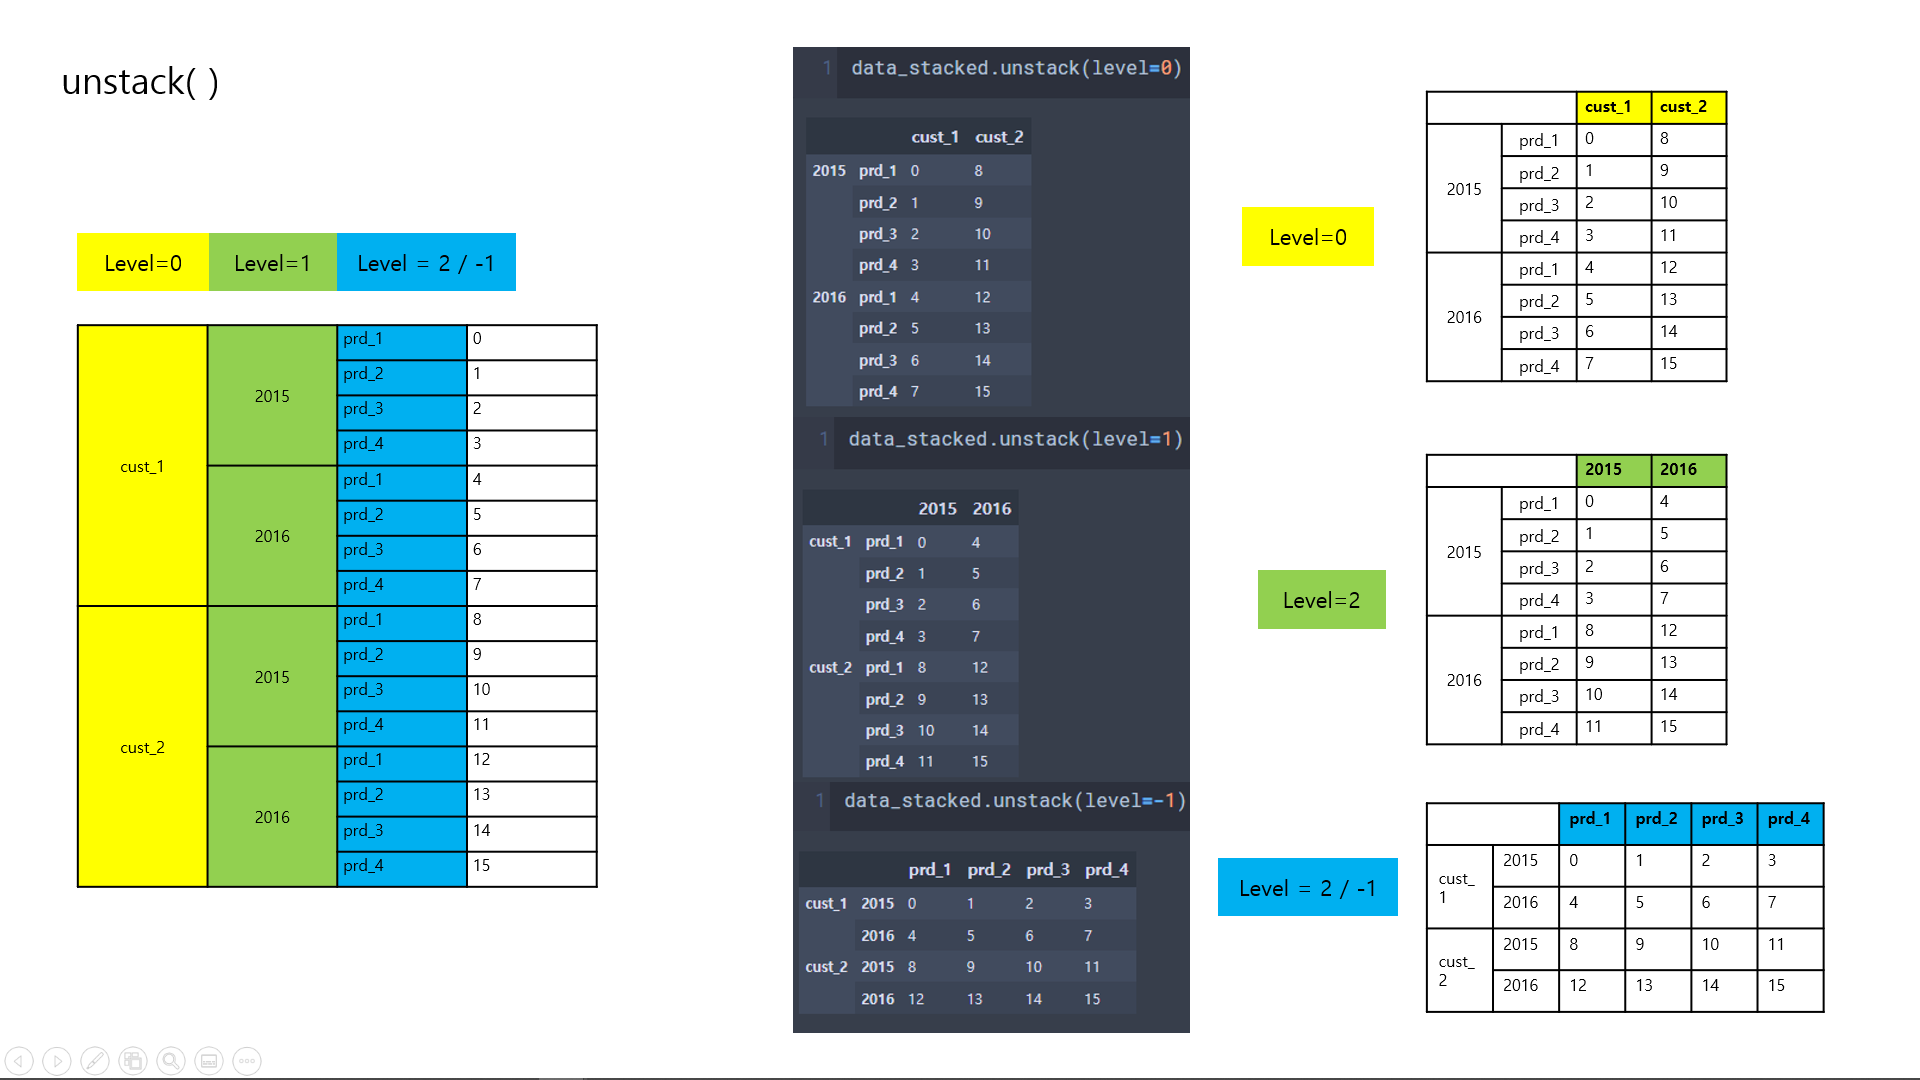

stack( ) => 자료형이 Series로 반환된다.

In [296]:
mul_index = pd.MultiIndex.from_tuples([('cust_1','2015'),('cust_1','2016'),
                                       ('cust_2','2015'),('cust_2','2016')])
data = pd.DataFrame(data=np.arange(16).reshape(4, 4), 
                    index=mul_index,
                    columns=['prd_1','prd_2','prd_3','prd_4'], 
                    dtype='int')
data

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [329]:
d1=data.stack()
d1.index

MultiIndex([('cust_1', '2015', 'prd_1'),
            ('cust_1', '2015', 'prd_2'),
            ('cust_1', '2015', 'prd_3'),
            ('cust_1', '2015', 'prd_4'),
            ('cust_1', '2016', 'prd_1'),
            ('cust_1', '2016', 'prd_2'),
            ('cust_1', '2016', 'prd_3'),
            ('cust_1', '2016', 'prd_4'),
            ('cust_2', '2015', 'prd_1'),
            ('cust_2', '2015', 'prd_2'),
            ('cust_2', '2015', 'prd_3'),
            ('cust_2', '2015', 'prd_4'),
            ('cust_2', '2016', 'prd_1'),
            ('cust_2', '2016', 'prd_2'),
            ('cust_2', '2016', 'prd_3'),
            ('cust_2', '2016', 'prd_4')],
           )

In [298]:
data_stacked.index

MultiIndex([('cust_1', '2015', 'prd_1'),
            ('cust_1', '2015', 'prd_2'),
            ('cust_1', '2015', 'prd_3'),
            ('cust_1', '2015', 'prd_4'),
            ('cust_1', '2016', 'prd_1'),
            ('cust_1', '2016', 'prd_2'),
            ('cust_1', '2016', 'prd_3'),
            ('cust_1', '2016', 'prd_4'),
            ('cust_2', '2015', 'prd_1'),
            ('cust_2', '2015', 'prd_2'),
            ('cust_2', '2015', 'prd_3'),
            ('cust_2', '2015', 'prd_4'),
            ('cust_2', '2016', 'prd_1'),
            ('cust_2', '2016', 'prd_2'),
            ('cust_2', '2016', 'prd_3'),
            ('cust_2', '2016', 'prd_4')],
           )

In [299]:
data_stacked['cust_2']['2015'][['prd_1','prd_2']]

prd_1    8
prd_2    9
dtype: int32

In [ ]:
data_stacked.unstack()

In [300]:
data_stacked.unstack(level=-1)

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [301]:
data_stacked.unstack(level=0)

cust_1  cust_2
2015 prd_1       0       8
     prd_2       1       9
     prd_3       2      10
     prd_4       3      11
2016 prd_1       4      12
     prd_2       5      13
     prd_3       6      14
     prd_4       7      15

In [302]:
data_stacked.unstack(level=1)

2015  2016
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

In [303]:
data_stacked_unstack=data_stacked.unstack(level=-1)
data_stacked_unstack

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [295]:
data_stacked_unstack_df = data_stacked_unstack.reset_index()
data_stacked_unstack_df

,level_0,level_1,prd_1,prd_2,prd_3,prd_4
0,cust_1,2015,0,1,2,3
1,cust_1,2016,4,5,6,7
2,cust_2,2015,8,9,10,11
3,cust_2,2016,12,13,14,15


In [327]:
mul_index = pd.MultiIndex.from_product([['A','B','C','D'], [2014,2015, 2016, 2017], [16, 17, 18, 19], [20, 21, 22, 23]])
mul_index
mm = pd.DataFrame({'1':range(256), 
                   '2':range(256)},
                  index= mul_index)
mm

1    2
A 2014 16 20    0    0
          21    1    1
          22    2    2
          23    3    3
       17 20    4    4
...           ...  ...
D 2017 18 23  251  251
       19 20  252  252
          21  253  253
          22  254  254
          23  255  255

[256 rows x 2 columns]

In [323]:
mm.unstack(level=-1)

1                   2               
            20   21   22   23   20   21   22   23
A 2014 16    0    1    2    3    0    1    2    3
       17    4    5    6    7    4    5    6    7
       18    8    9   10   11    8    9   10   11
       19   12   13   14   15   12   13   14   15
  2015 16   16   17   18   19   16   17   18   19
...        ...  ...  ...  ...  ...  ...  ...  ...
D 2016 19  236  237  238  239  236  237  238  239
  2017 16  240  241  242  243  240  241  242  243
       17  244  245  246  247  244  245  246  247
       18  248  249  250  251  248  249  250  251
       19  252  253  254  255  252  253  254  255

[64 rows x 8 columns]

In [324]:
mm.unstack(level=2)

1                   2               
            16   17   18   19   16   17   18   19
A 2014 20    0    4    8   12    0    4    8   12
       21    1    5    9   13    1    5    9   13
       22    2    6   10   14    2    6   10   14
       23    3    7   11   15    3    7   11   15
  2015 20   16   20   24   28   16   20   24   28
...        ...  ...  ...  ...  ...  ...  ...  ...
D 2016 23  227  231  235  239  227  231  235  239
  2017 20  240  244  248  252  240  244  248  252
       21  241  245  249  253  241  245  249  253
       22  242  246  250  254  242  246  250  254
       23  243  247  251  255  243  247  251  255

[64 rows x 8 columns]

In [325]:
mm.unstack(level=3)

1                   2               
            20   21   22   23   20   21   22   23
A 2014 16    0    1    2    3    0    1    2    3
       17    4    5    6    7    4    5    6    7
       18    8    9   10   11    8    9   10   11
       19   12   13   14   15   12   13   14   15
  2015 16   16   17   18   19   16   17   18   19
...        ...  ...  ...  ...  ...  ...  ...  ...
D 2016 19  236  237  238  239  236  237  238  239
  2017 16  240  241  242  243  240  241  242  243
       17  244  245  246  247  244  245  246  247
       18  248  249  250  251  248  249  250  251
       19  252  253  254  255  252  253  254  255

[64 rows x 8 columns]

## 데이터 집계와 그룹 연산

### 집계 연산(Aggregation)

|집계|설명|
|:--|:--|
|```count```|전체 갯수|
|```head, tail```|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|```describe```|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|```min, max```|최소값, 최대값|
|```cummin, cummax```|누적 최소값, 누적 최대값|
|```argmin, argmax```|최소값과 최대값의 색인 위치|
|```idxmin, idxmax```|최소값과 최대값의 색인값|
|```mean, median```|평균값, 중앙값|
|```std, var```|표준편차, 분산|
|```skew```|왜도 값 계산|
|```kurt```|첨도 값 계산|
|```mad```|절대 평균 편차|
|```sum, cusum```|전체 항목 합, 누적합|
|```prod, cumprod```|전체 항목 곱, 누적곱|
|```quatile```|0부터 1까지의 분위수 계산(괄호안에 0.25, 0.5, 0.75 등의 숫자를 입력해야 함(기본값은 0.5))|
|```diff```|1차 산술차 계산|
|```pct_change```|퍼센트 변화율 계산|
|```corr, cov```|상관관계, 공분산 계산|

In [248]:
df = pd.DataFrame([[1, 1.2, np.nan],
                   [2.4, 5.5, 4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44, -3.1, 4.1]], 
                 index=[1, 2, 3, 4],
                 columns = ['A','B','C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,4.1


In [249]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1  4.1
2 2


In [250]:
dft = pd.DataFrame({'a':[1, 2, 3, 4],
                    'b':[8, 5, 6, 7],
                    'c':[10, 11, 9, 12]})
dft

,a,b,c
0,1,8,10
1,2,5,11
2,3,6,9
3,4,7,12


In [251]:
print(np.argmin(dft),np.argmax(dft))
# 최소값과 최대값의 index를 반환한다.

0 11


In [252]:
print(dft.idxmin())
print(dft.idxmax())
# 최소값이 있는 index(여기서 index는 색인 바로 columns이 아닌 것을 뜻한다)가 무엇인지를 알려준다
# 'a' column에 있는 '0' index에 가장 작은 값이 존재한다.
# 'a' column에 있는 '3' index에 가장 큰 값이 존재한다.

a    0
b    1
c    2
dtype: int64
a    3
b    0
c    3
dtype: int64


In [253]:
dft.take([0,1,2])

,a,b,c
0,1,8,10
1,2,5,11
2,3,6,9


In [254]:
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,4.1


In [255]:
print(df.skew())
print()
print(df.kurt())

A    1.15207
B    0.00000
C        NaN
dtype: float64

A   NaN
B   NaN
C   NaN
dtype: float64


In [256]:
dft

,a,b,c
0,1,8,10
1,2,5,11
2,3,6,9
3,4,7,12


왜도와 첨도란?<br>

왜도 값이 양의 값을 가지면 Data의 중심(평균)이 정규 분포보다 왼쪽으로 치우쳐져 있고<br>
(즉, 분포의 제일 높은 지점이 왼쪽에 있고)<br>
꼬리는 오른쪽으로 길어지게 표현된다. -> Right-skewed  
  
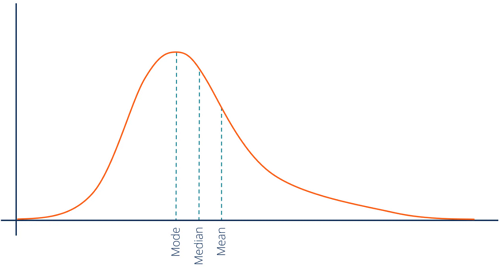 <br>
<br>
왜도 값이 음의 값을 가지면 Data의 중심(평균)이 정규 분포보다 오른쪽으로 치우쳐져 있고<br>
(즉, 분포의 제일 높은 지점이 오른쪽에 있고)<br>
꼬리는 왼쪽으로 늘어지게 표현된다. -> left-skewed<br>
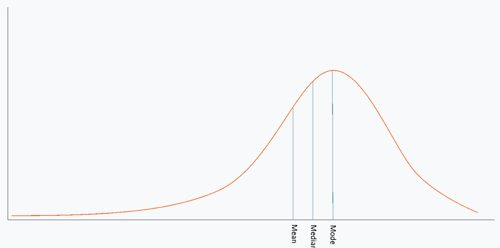 <br>
<br>
<br>
왜도 값이 -2 ~ 2 정도의 치우침은 왜도가 크지 않다고 판단한다. <br>
절대값 3미만이면 기준에 부합

첨도<br>
<br>

측정치의 빈도수를 나타낼 때 나타나는 분포의 뾰족한 형태를 "첨도"라고 함<br>
샘플의 점수가 평균을 중심으로 가까이 몰려 있을 수록 분포의 정점은 더욱 뾰족한 모양, 즉 첨도가 커진다.<br>
분포의 분산도가 크면 집단이 이질적이고 분포의 높이가 낮아지며, 분산도가 작으면 집단이 동질적이고 분포의 높이가 높아짐<br>
정규분포의 첨도는 0이며, 첨도가 0보다 크면 정규분포보다 더 뾰족한 모양을 갖는 고첨이 되고, <br>
첨도가 0보다 작으면 분포의 높이가 정규분포보다 낮아지는 저첨이 된다.<br>

<br>

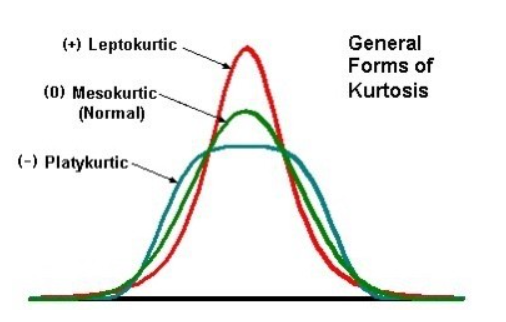

<br>
첨도가 절대값 7미만이면 기준에 부합하는 것으로 간주

In [257]:
print(dft.skew())
print()
print(dft.kurt())

a    0.0
b    0.0
c    0.0
dtype: float64

a   -1.2
b   -1.2
c   -1.2
dtype: float64


In [258]:
dff = pd.DataFrame({'A':[1, 1, 1,  120, 3, 92, 1, 120, 10000000],
                    'B':[50, 60, 70, 80, 90, 100, 110, 120, 130],
                    'C':np.random.randint(1, 100, (9))})
dff

,A,B,C
0,1,50,7
1,1,60,93
2,1,70,80
3,120,80,55
4,3,90,70
5,92,100,7
6,1,110,73
7,120,120,66
8,10000000,130,15


In [259]:
print(dff.skew()) 
# 'A'의 왜도의 절대값이 3이므로 왜도가 기준치보다 높다.
# 왼쪽으로 꼬리가 긴 그래프
# 'A'의 평균이 중앙값보다 크다.
print()
print(dff.A.mean() > dff.A.median())
print()
print(dff.kurt())

A    3.000000
B    0.000000
C   -0.516254
dtype: float64

True

A    9.000000
B   -1.200000
C   -1.565178
dtype: float64


In [260]:
print(dff.mad())

A    1.975300e+06
B    2.222222e+01
C    2.807407e+01
dtype: float64


In [261]:
dff.cumsum()

,A,B,C
0,1,50,7
1,2,110,100
2,3,180,180
3,123,260,235
4,126,350,305
5,218,450,312
6,219,560,385
7,339,680,451
8,10000339,810,466


In [262]:
dff.A.median()

3.0

In [263]:
dff.quantile()

A     3.0
B    90.0
C    66.0
Name: 0.5, dtype: float64

In [264]:
dff.corr()

,A,B,C
A,1.000000,0.547729,-0.414579
B,0.547729,1.000000,-0.152296
C,-0.414579,-0.152296,1.000000


In [265]:
dff.corrwith(dff.B)

A    0.547729
B    1.000000
C   -0.152296
dtype: float64

In [266]:
dff.cov()

,A,B,C
A,1.111102e+13,50000406.25,-4.597246e+07
B,5.000041e+07,750.00,-1.387500e+02
C,-4.597246e+07,-138.75,1.106694e+03


### GroupBy 연산

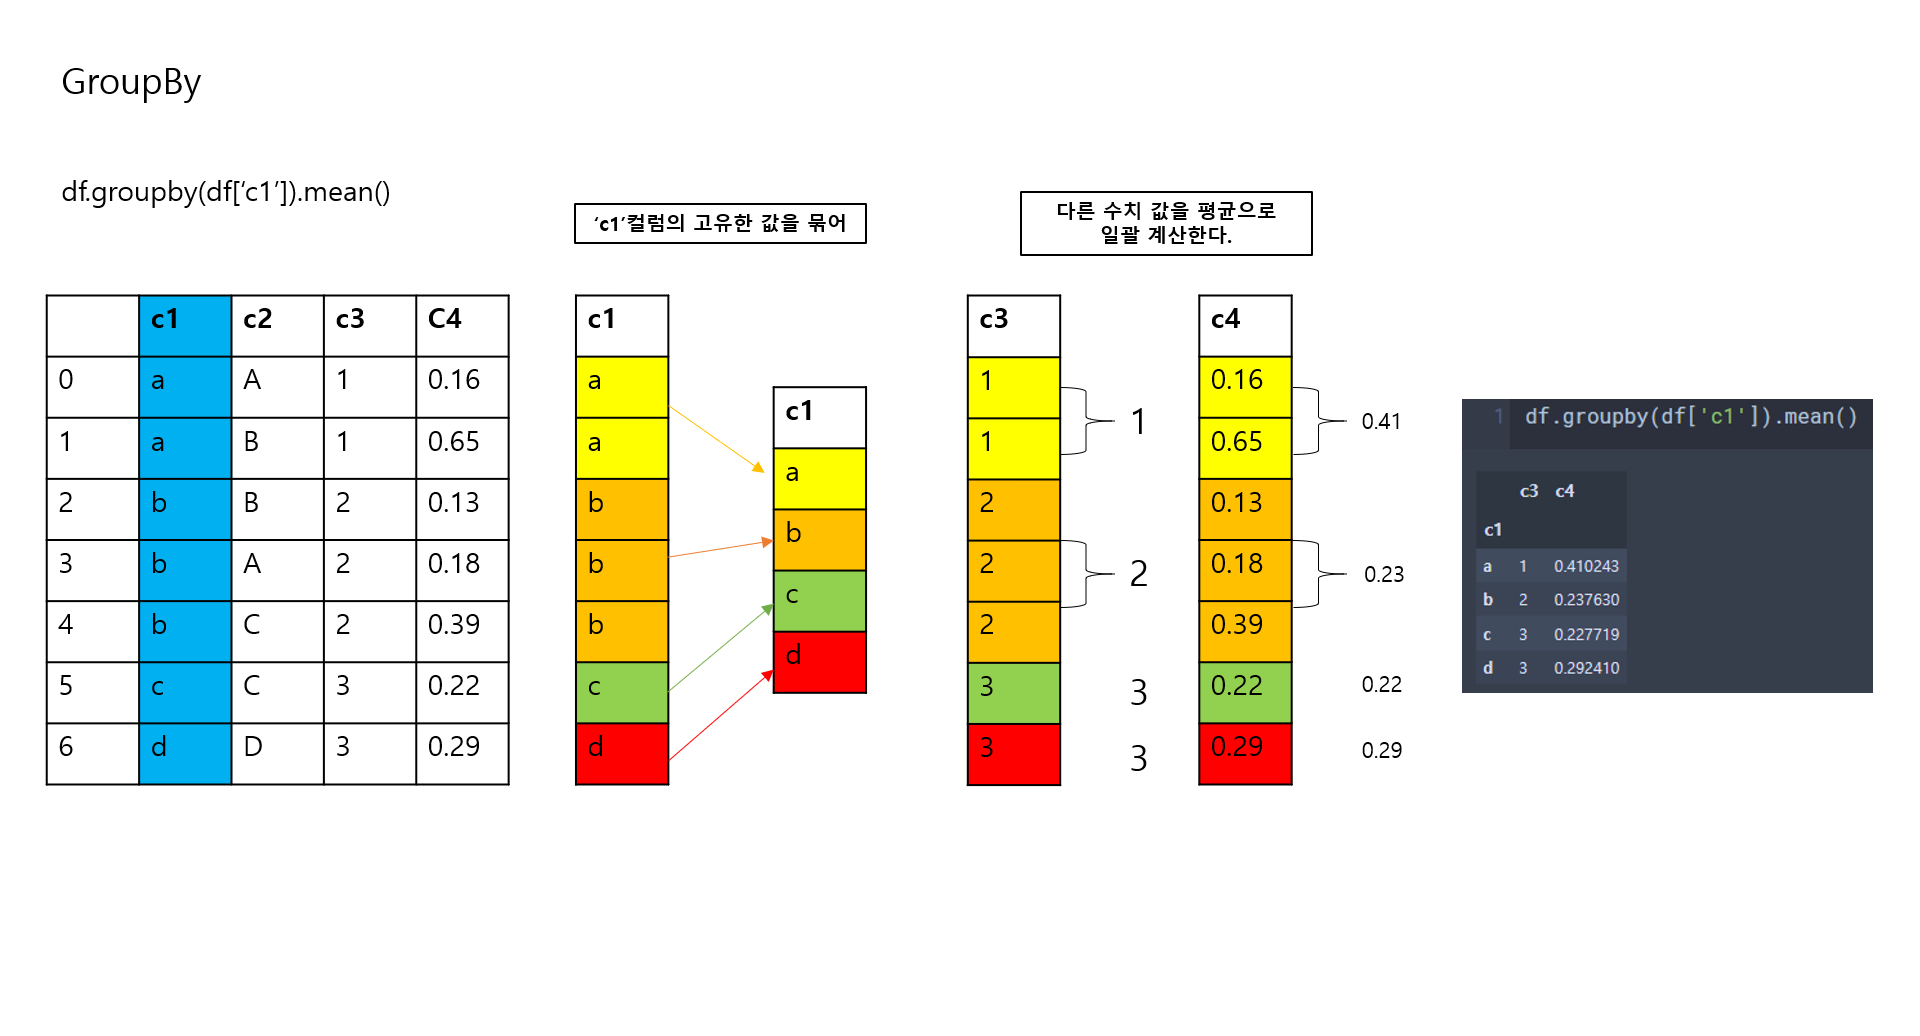

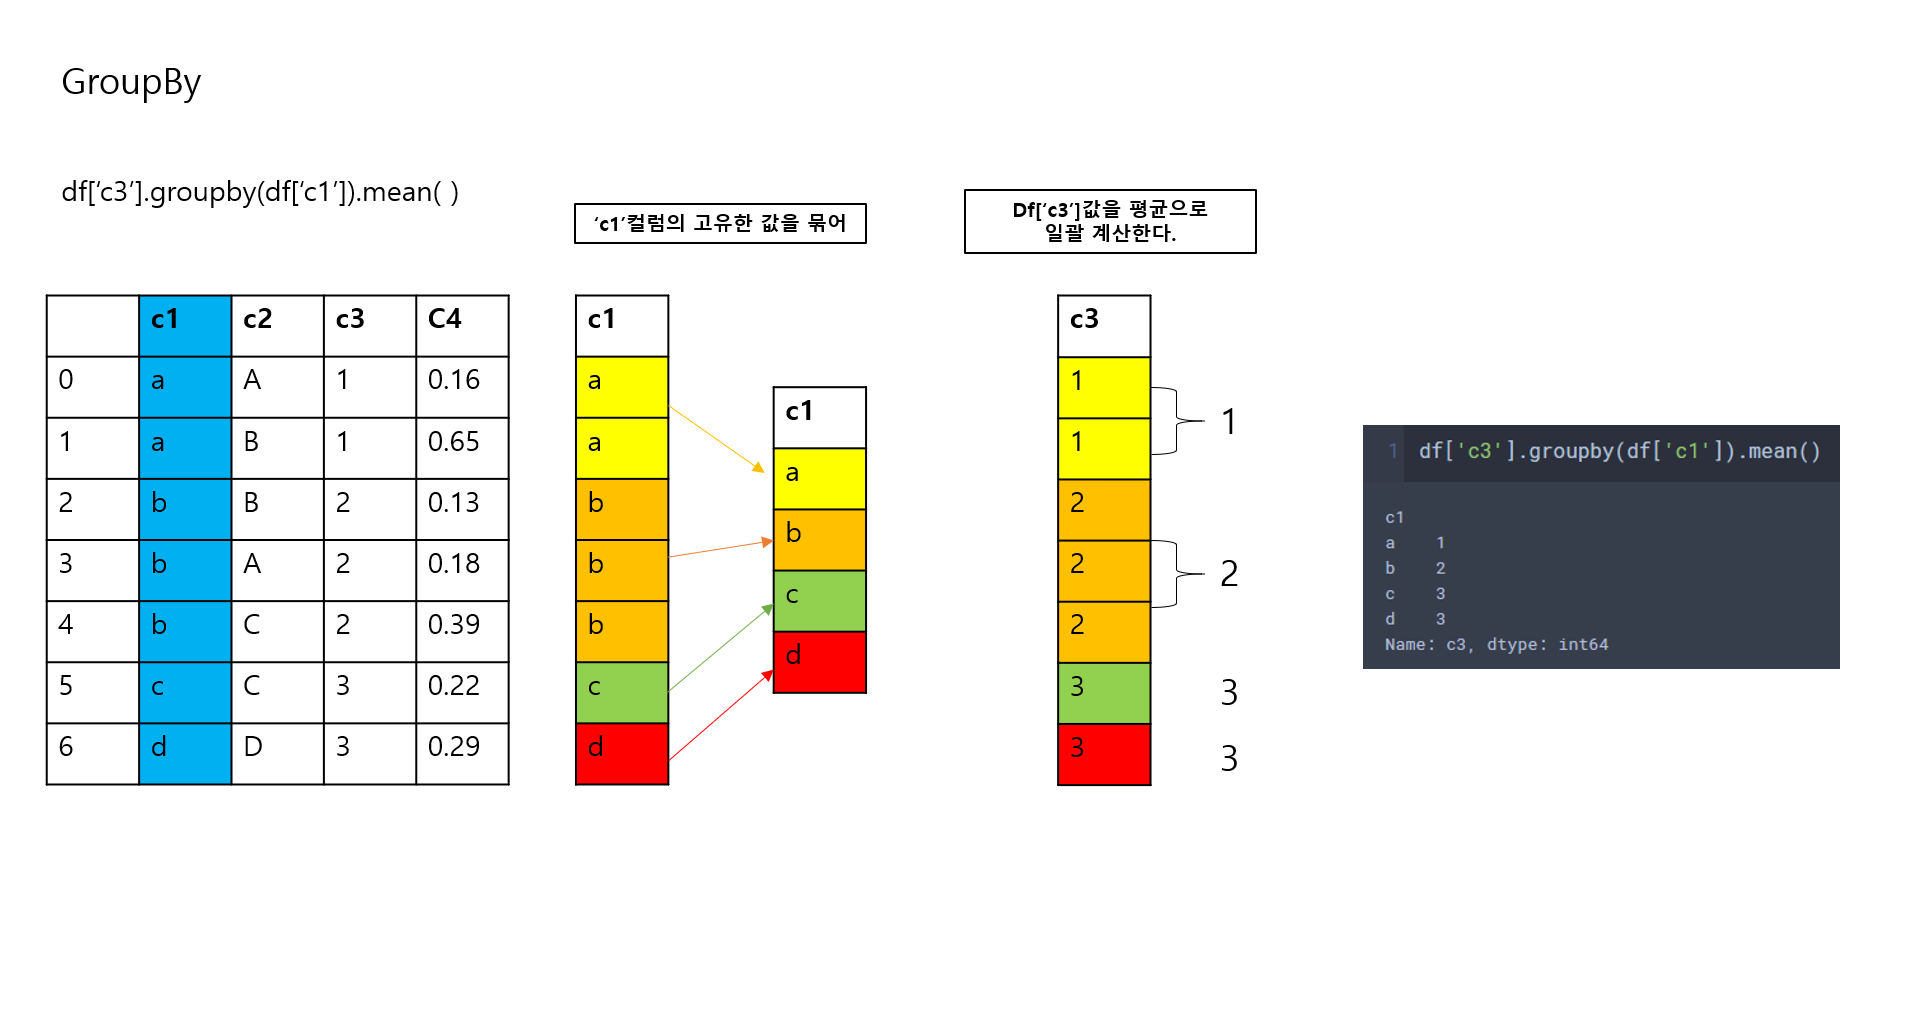

In [267]:
df = pd.DataFrame({'c1': ['a','a','b','b','b','c','d',],
                   'c2': ['A','B','B','A','C','C','D'],
                   'c3': [1, 1, 2, 2, 2, 3, 3],
                   'c4': np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,1,0.559586
1,a,B,1,0.991964
2,b,B,2,0.918049
3,b,A,2,0.752620
4,b,C,2,0.822020
5,c,C,3,0.173878
6,d,D,3,0.484844


In [268]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [269]:
df['c3'].groupby(df['c1']).mean()

c1
a    1
b    2
c    3
d    3
Name: c3, dtype: int64

In [270]:
df.groupby(df['c1']).mean()

,c3,c4
c1,,
a,1,0.775775
b,2,0.830896
c,3,0.173878
d,3,0.484844


In [271]:
df['c4'].groupby([df['c1'],df['c2']]).mean()

c1  c2
a   A     0.559586
    B     0.991964
b   A     0.752620
    B     0.918049
    C     0.822020
c   C     0.173878
d   D     0.484844
Name: c4, dtype: float64

In [277]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.249025,0.818762,NaN,NaN
b,0.651123,0.808960,0.672217,NaN
c,NaN,NaN,0.469107,NaN
d,NaN,NaN,NaN,0.317097


In [330]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.249025
    B     0.818762
b   A     0.651123
    B     0.808960
    C     0.672217
c   C     0.469107
d   D     0.317097
Name: c4, dtype: float64

In [333]:
df['c4'].groupby([df['c1'],df['c2']]).mean().to_frame()

c4
c1 c2          
a  A   0.249025
   B   0.818762
b  A   0.651123
   B   0.808960
   C   0.672217
c  C   0.469107
d  D   0.317097

In [334]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,1,0.533893
b,2,0.710767
c,3,0.469107
d,3,0.317097


In [336]:
df.groupby(['c1','c2']).mean()

c3        c4
c1 c2              
a  A    1  0.249025
   B    1  0.818762
b  A    2  0.651123
   B    2  0.808960
   C    2  0.672217
c  C    3  0.469107
d  D    3  0.317097

In [342]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   C     1
d   D     1
dtype: int64

In [346]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   1  0.249025
1  a  B   1  0.818762
b
  c1 c2  c3        c4
2  b  B   2  0.808960
3  b  A   2  0.651123
4  b  C   2  0.672217
c
  c1 c2  c3        c4
5  c  C   3  0.469107
d
  c1 c2  c3        c4
6  d  D   3  0.317097


In [348]:
df.groupby(['c1','c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.249025
   B   0.818762
b  A   0.651123
   B   0.808960
   C   0.672217
c  C   0.469107
d  D   0.317097

In [350]:
df.groupby(['c1','c2'])['c4'].agg(['min','max','mean'])

min       max      mean
c1 c2                              
a  A   0.249025  0.249025  0.249025
   B   0.818762  0.818762  0.818762
b  A   0.651123  0.651123  0.651123
   B   0.808960  0.808960  0.808960
   C   0.672217  0.672217  0.672217
c  C   0.469107  0.469107  0.469107
d  D   0.317097  0.317097  0.317097

In [355]:
df.groupby(['c1','c2'], as_index=False).mean()

,c1,c2,c3,c4
0,a,A,1,0.249025
1,a,B,1,0.818762
2,b,A,2,0.651123
3,b,B,2,0.808960
4,b,C,2,0.672217
5,c,C,3,0.469107
6,d,D,3,0.317097


In [356]:
def top(df, n=3, column='c1'):
    
    return df.sort_values(by=column)[-n:]

top(df, n=5)

,c1,c2,c3,c4
2,b,B,2,0.808960
3,b,A,2,0.651123
4,b,C,2,0.672217
5,c,C,3,0.469107
6,d,D,3,0.317097


In [365]:
dff = pd.DataFrame({'국가': ['한국','미국','필리핀', '홍콩', '호주', '영국'],
                    '축구 점수': [5, 3, 2, 1, 4, 6],
                    '농구 점수': [1, 3, 2, 5, 6, 4],
                    '야구 점수': [3, 2, 5, 1, 4, 6]})
dff

,국가,축구 점수,농구 점수,야구 점수
0,한국,5,1,3
1,미국,3,3,2
2,필리핀,2,2,5
3,홍콩,1,5,1
4,호주,4,6,4
5,영국,6,4,6


In [367]:
dff['평균 순위'] = round((dff['축구 점수'] + dff['농구 점수'] + dff['야구 점수'])/3, 1)
dff

,국가,축구 점수,농구 점수,야구 점수,평균 순위
0,한국,5,1,3,3.0
1,미국,3,3,2,2.7
2,필리핀,2,2,5,3.0
3,홍콩,1,5,1,2.3
4,호주,4,6,4,4.7
5,영국,6,4,6,5.3


In [387]:
def Top_n(table, column, n=3):
    
    return table.sort_values(by=column, ascending=False)[-3:]

Top_n(dff, '축구 점수')

,국가,축구 점수,농구 점수,야구 점수,평균 순위
1,미국,3,3,2,2.7
2,필리핀,2,2,5,3.0
3,홍콩,1,5,1,2.3


In [388]:
Top_n(dff, '평균 순위')

,국가,축구 점수,농구 점수,야구 점수,평균 순위
2,필리핀,2,2,5,3.0
1,미국,3,3,2,2.7
3,홍콩,1,5,1,2.3


### 피벗 테이블 (Pivot Table)
|함수|설명|
|:-|:-|
|```values```|집계하려는 컬럼 이름 혹은 이름의 리스트. 기본적으로 모든 숫자 컬럼 집계|
|```index```|피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키|
|```columns```|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키|
|```aggfunc```|집계 함수나 함수 리스트. 기본값으로 ```mean```이 사용|
|```fil_value```|결과 테이블에서 누락된 값 대체를 위한 값|
|```dropna```|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음|
|```margins```|부분 합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본값은 False|

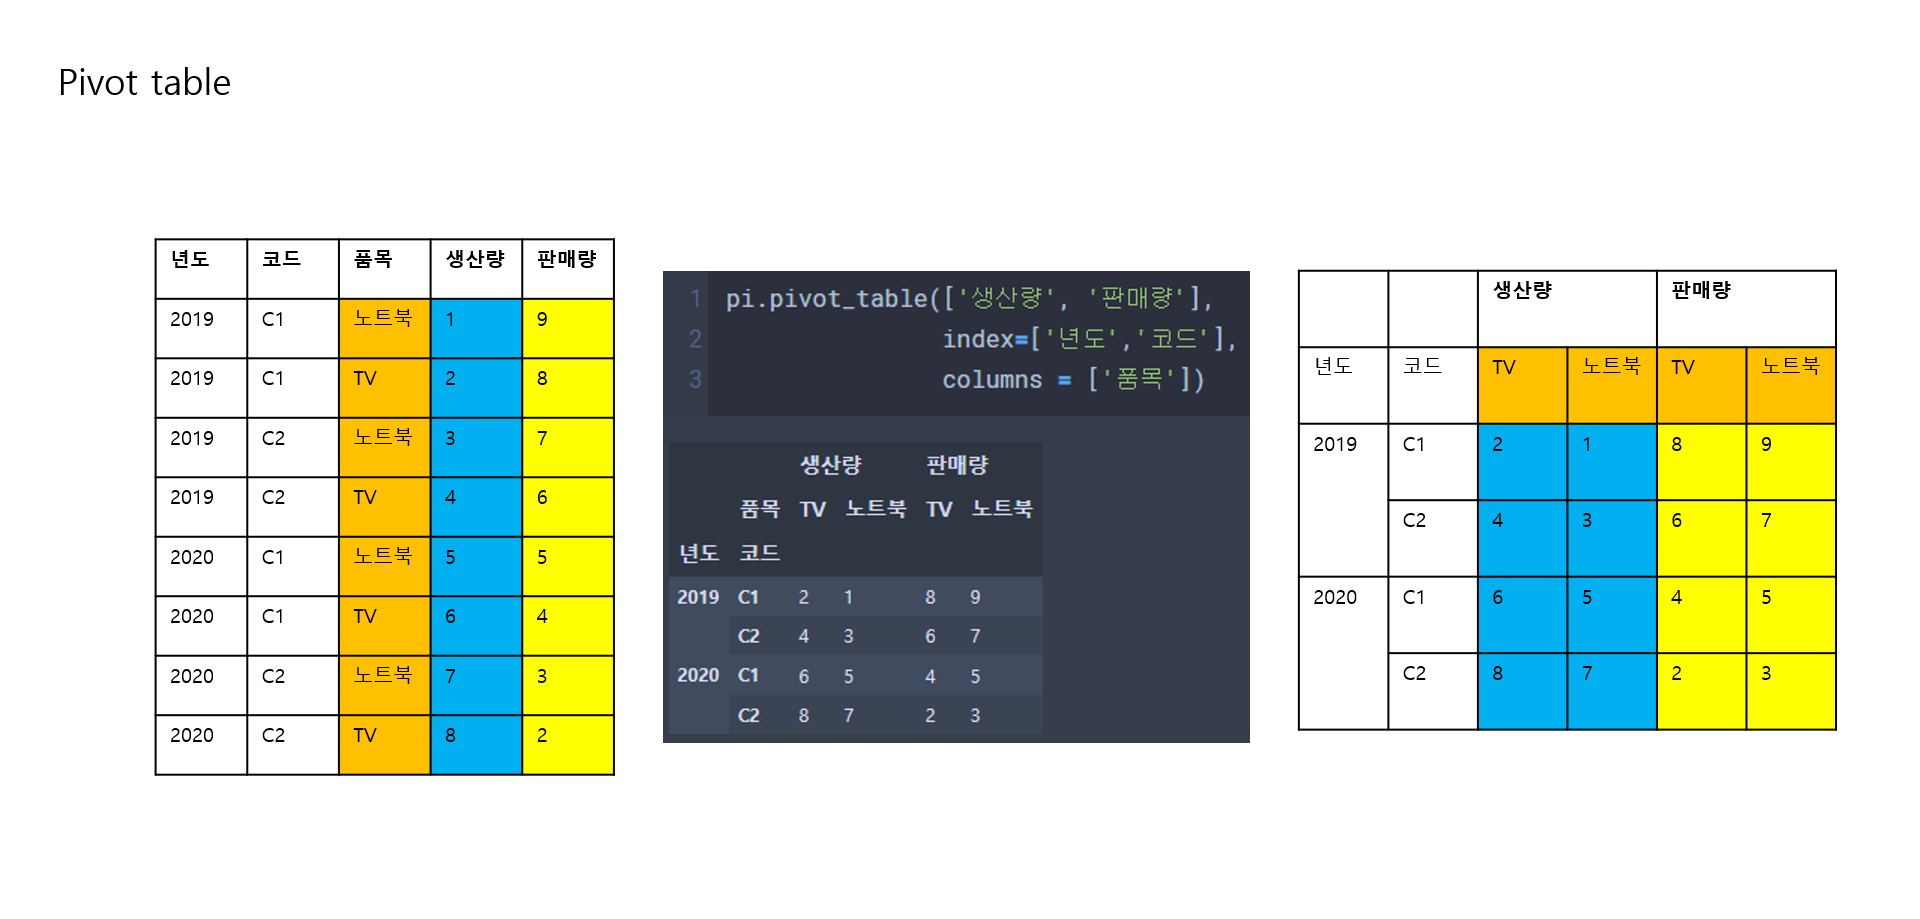

In [390]:
df

,c1,c2,c3,c4
0,a,A,1,0.249025
1,a,B,1,0.818762
2,b,B,2,0.808960
3,b,A,2,0.651123
4,b,C,2,0.672217
5,c,C,3,0.469107
6,d,D,3,0.317097


In [396]:
dft = pd.DataFrame({'국가': ['한국','미국','필리핀', '홍콩', '호주', '영국'],
                    '축구 점수': [1, 3, 2, 1, 4, 6],
                    '농구 점수': [1, 3, 2, 5, 6, 4],
                    '야구 점수': [1, 2, 5, 1, 4, 6]})
dft

,국가,축구 점수,농구 점수,야구 점수
0,한국,1,1,1
1,미국,3,3,2
2,필리핀,2,2,5
3,홍콩,1,5,1
4,호주,4,6,4
5,영국,6,4,6


In [398]:
dft.pivot_table(['축구 점수', '농구 점수'], index=['국가'],
               columns=['야구 점수'])

농구 점수                     축구 점수                    
야구 점수     1    2    4    5    6     1    2    4    5    6
국가                                                       
미국      NaN  3.0  NaN  NaN  NaN   NaN  3.0  NaN  NaN  NaN
영국      NaN  NaN  NaN  NaN  4.0   NaN  NaN  NaN  NaN  6.0
필리핀     NaN  NaN  NaN  2.0  NaN   NaN  NaN  NaN  2.0  NaN
한국      1.0  NaN  NaN  NaN  NaN   1.0  NaN  NaN  NaN  NaN
호주      NaN  NaN  6.0  NaN  NaN   NaN  NaN  4.0  NaN  NaN
홍콩      5.0  NaN  NaN  NaN  NaN   1.0  NaN  NaN  NaN  NaN

In [399]:
dft.pivot_table(['축구 점수', '농구 점수'], 
                index=['국가'],
                columns=['야구 점수'], 
                margins= True)

농구 점수                          축구 점수                              
야구 점수     1    2    4    5    6  All     1    2    4    5    6       All
국가                                                                      
미국      NaN  3.0  NaN  NaN  NaN  3.0   NaN  3.0  NaN  NaN  NaN  3.000000
영국      NaN  NaN  NaN  NaN  4.0  4.0   NaN  NaN  NaN  NaN  6.0  6.000000
필리핀     NaN  NaN  NaN  2.0  NaN  2.0   NaN  NaN  NaN  2.0  NaN  2.000000
한국      1.0  NaN  NaN  NaN  NaN  1.0   1.0  NaN  NaN  NaN  NaN  1.000000
호주      NaN  NaN  6.0  NaN  NaN  6.0   NaN  NaN  4.0  NaN  NaN  4.000000
홍콩      5.0  NaN  NaN  NaN  NaN  5.0   1.0  NaN  NaN  NaN  NaN  1.000000
All     3.0  3.0  6.0  2.0  4.0  3.5   1.0  3.0  4.0  2.0  6.0  2.833333

In [499]:
import random

date = ['2018', '2019', '2020'] *10 + ['2020']
date = pd.to_datetime(date)
date = date.to_period(freq='A')
date = pd.Series(date)

col = ['c1','c2','c3'] * 10 + ['c3']
random.shuffle(col)
col = pd.Series(col)

product = ['냉장고', 'TV','컴퓨터', '그래픽카드', '모니터'] * 6 + ['노트북']
random.shuffle(product)
product = pd.Series(product)

production = np.random.randint(800, 2000, 31)
production = pd.Series(production)
sell = np.random.randint(400, 900, 31)
sell = pd.Series(sell)

In [500]:
for_pivot = pd.concat([date, col, product, production, sell], axis=1)
for_pivot.columns=['날짜','코드', '품목', '출고','판매']
for_pivot.head()

,날짜,코드,품목,출고,판매
0,2018,c1,그래픽카드,1367,783
1,2019,c1,TV,1708,782
2,2020,c3,컴퓨터,1671,423
3,2018,c2,TV,1651,658
4,2019,c2,냉장고,1873,418


In [502]:
for_pivot.pivot_table(['출고', '판매'],
                      index=['날짜','코드'],
                      columns=[ '품목'])

출고                                             판매                \
품목           TV   그래픽카드     냉장고     노트북     모니터     컴퓨터     TV  그래픽카드    냉장고   
날짜   코드                                                                        
2018 c1   850.0  1367.0     NaN     NaN  1141.0     NaN  436.0  783.0    NaN   
     c2  1651.0     NaN     NaN     NaN  1640.0  1349.0  658.0    NaN    NaN   
     c3   831.0  1267.5   982.0     NaN     NaN     NaN  733.0  575.0  627.0   
2019 c1  1708.0     NaN  1150.0     NaN     NaN  1219.0  782.0    NaN  683.0   
     c2     NaN     NaN  1720.5     NaN  1956.0  1285.0    NaN    NaN  566.5   
     c3  1229.0     NaN  1714.0     NaN     NaN  1631.0  564.0    NaN  619.0   
2020 c1     NaN     NaN  1862.0  1468.0  1540.5     NaN    NaN    NaN  467.0   
     c2  1478.0  1891.0     NaN     NaN     NaN  1341.0  743.0  714.0    NaN   
     c3     NaN  1375.5     NaN     NaN  1117.0  1671.0    NaN  594.5    NaN   

                              
품목         노트북    모니터    컴퓨터  
날짜   코드                       
2018 c1    NaN  698.0    NaN  
     c2    NaN  619.0  635.0  
     c3    NaN    NaN    NaN  
2019 c1    NaN    NaN  487.0  
     c2    NaN  595.0  551.0  
     c3    NaN    NaN  481.0  
2020 c1  704.0  570.5    NaN  
     c2    NaN    NaN  628.0  
     c3    NaN  430.0  423.0

In [504]:
for_pivot.pivot_table(['출고', '판매'],
                      index=['날짜','코드'],
                      columns=[ '품목'],
                      margins=True)

출고                                                    \
품목                TV   그래픽카드          냉장고     노트북          모니터     컴퓨터   
날짜   코드                                                                  
2018 c1   850.000000  1367.0          NaN     NaN  1141.000000     NaN   
     c2  1651.000000     NaN          NaN     NaN  1640.000000  1349.0   
     c3   831.000000  1267.5   982.000000     NaN          NaN     NaN   
2019 c1  1708.000000     NaN  1150.000000     NaN          NaN  1219.0   
     c2          NaN     NaN  1720.500000     NaN  1956.000000  1285.0   
     c3  1229.000000     NaN  1714.000000     NaN          NaN  1631.0   
2020 c1          NaN     NaN  1862.000000  1468.0  1540.500000     NaN   
     c2  1478.000000  1891.0          NaN     NaN          NaN  1341.0   
     c3          NaN  1375.5          NaN     NaN  1117.000000  1671.0   
All      1291.166667  1424.0  1524.833333  1468.0  1489.166667  1416.0   

                              판매                                        \
품목               All          TV       그래픽카드         냉장고    노트북    모니터   
날짜   코드                                                                  
2018 c1  1119.333333  436.000000  783.000000         NaN    NaN  698.0   
     c2  1546.666667  658.000000         NaN         NaN    NaN  619.0   
     c3  1087.000000  733.000000  575.000000  627.000000    NaN    NaN   
2019 c1  1359.000000  782.000000         NaN  683.000000    NaN    NaN   
     c2  1670.500000         NaN         NaN  566.500000    NaN  595.0   
     c3  1524.666667  564.000000         NaN  619.000000    NaN    NaN   
2020 c1  1602.750000         NaN         NaN  467.000000  704.0  570.5   
     c2  1570.000000  743.000000  714.000000         NaN    NaN    NaN   
     c3  1384.750000         NaN  594.500000         NaN    NaN  430.0   
All      1430.290323  652.666667  639.333333  588.166667  704.0  580.5   

                                 
품목              컴퓨터         All  
날짜   코드                          
2018 c1         NaN  639.000000  
     c2  635.000000  637.333333  
     c3         NaN  627.500000  
2019 c1  487.000000  650.666667  
     c2  551.000000  569.750000  
     c3  481.000000  554.666667  
2020 c1         NaN  578.000000  
     c2  628.000000  695.000000  
     c3  423.000000  510.500000  
All      534.166667  602.354839

In [521]:
date = pd.to_datetime(['2018','2019','2020']).to_period(freq='A')
date = pd.Series(date)
code = pd.Series(['C1','C2','C3'])
product = pd.Series(['TV', '그래픽카드','노트북'])
production = pd.Series(np.random.randint(800, 2000, 3))
sell = pd.Series(np.random.randint(400, 900, 3))

for_pivot = pd.concat([date, code, product, production, sell], axis=1)
for_pivot.columns=['날짜','코드','품목','출고','판매']
for_pivot

,날짜,코드,품목,출고,판매
0,2018,C1,TV,1015,447
1,2019,C2,그래픽카드,1493,648
2,2020,C3,노트북,878,824


In [522]:
for_pivot.pivot_table(['출고','판매'],
                      index=['날짜','코드'],
                      columns=['품목'])

출고                    판매              
품목           TV   그래픽카드    노트북     TV  그래픽카드    노트북
날짜   코드                                            
2018 C1  1015.0     NaN    NaN  447.0    NaN    NaN
2019 C2     NaN  1493.0    NaN    NaN  648.0    NaN
2020 C3     NaN     NaN  878.0    NaN    NaN  824.0

In [529]:
midx = pd.MultiIndex.from_product([['2018','2019','2020'],['C1','C2','C3'],['TV','그래픽카드', '노트북']])
midx

MultiIndex([('2018', 'C1',    'TV'),
            ('2018', 'C1', '그래픽카드'),
            ('2018', 'C1',   '노트북'),
            ('2018', 'C2',    'TV'),
            ('2018', 'C2', '그래픽카드'),
            ('2018', 'C2',   '노트북'),
            ('2018', 'C3',    'TV'),
            ('2018', 'C3', '그래픽카드'),
            ('2018', 'C3',   '노트북'),
            ('2019', 'C1',    'TV'),
            ('2019', 'C1', '그래픽카드'),
            ('2019', 'C1',   '노트북'),
            ('2019', 'C2',    'TV'),
            ('2019', 'C2', '그래픽카드'),
            ('2019', 'C2',   '노트북'),
            ('2019', 'C3',    'TV'),
            ('2019', 'C3', '그래픽카드'),
            ('2019', 'C3',   '노트북'),
            ('2020', 'C1',    'TV'),
            ('2020', 'C1', '그래픽카드'),
            ('2020', 'C1',   '노트북'),
            ('2020', 'C2',    'TV'),
            ('2020', 'C2', '그래픽카드'),
            ('2020', 'C2',   '노트북'),
            ('2020', 'C3',    'TV'),
            ('2020', 'C3', '그래픽카드'),
            ('2020', 'C3',   '노트북')],


In [549]:
one = [[ int(i) for i in range(1, 28) ],[ int(i) for i in range(28, 1, -1)]]
three = pd.DataFrame({'one':[int(i) for i in range(1, 28)],
                       'two':[int(i) for i in range(28, 1, -1)]}, index = midx)
three = three.reset_index()
three.columns = ['년도', '코드','품목','생산량', '판매량']
three

,년도,코드,품목,생산량,판매량
0,2018,C1,TV,1,28
1,2018,C1,그래픽카드,2,27
2,2018,C1,노트북,3,26
3,2018,C2,TV,4,25
4,2018,C2,그래픽카드,5,24
5,2018,C2,노트북,6,23
6,2018,C3,TV,7,22
7,2018,C3,그래픽카드,8,21
8,2018,C3,노트북,9,20
9,2019,C1,TV,10,19


In [555]:
three.groupby(three.코드).sum()

,생산량,판매량
코드,,
C1,99,162
C2,126,135
C3,153,108


In [551]:
three.pivot_table(['생산량','판매량'],
                  index = ['년도','코드'],
                  columns=['품목'], 
                  margins=True)

생산량               판매량              
품목       TV 그래픽카드 노트북 All  TV 그래픽카드 노트북 All
년도   코드                                    
2018 C1   1     2   3   2  28    27  26  27
     C2   4     5   6   5  25    24  23  24
     C3   7     8   9   8  22    21  20  21
2019 C1  10    11  12  11  19    18  17  18
     C2  13    14  15  14  16    15  14  15
     C3  16    17  18  17  13    12  11  12
2020 C1  19    20  21  20  10     9   8   9
     C2  22    23  24  23   7     6   5   6
     C3  25    26  27  26   4     3   2   3
All      13    14  15  14  16    15  14  15

In [557]:
mdff = pd.MultiIndex.from_product([[2019, 2020], ['C1','C2'],['노트북','TV']])
mdff

MultiIndex([(2019, 'C1', '노트북'),
            (2019, 'C1',  'TV'),
            (2019, 'C2', '노트북'),
            (2019, 'C2',  'TV'),
            (2020, 'C1', '노트북'),
            (2020, 'C1',  'TV'),
            (2020, 'C2', '노트북'),
            (2020, 'C2',  'TV')],
           )

In [565]:
prod = [ i for i in range(1, 9) ]
sell = [ z for z in range(9, 1, -1) ]
pi = pd.DataFrame({'생산량':prod,
                   '판매량':sell},
                 index=mdff)
pi.reset_index(inplace=True)
pi.columns = ['년도', '코드','품목','생산량','판매량']
pi

,년도,코드,품목,생산량,판매량
0,2019,C1,노트북,1,9
1,2019,C1,TV,2,8
2,2019,C2,노트북,3,7
3,2019,C2,TV,4,6
4,2020,C1,노트북,5,5
5,2020,C1,TV,6,4
6,2020,C2,노트북,7,3
7,2020,C2,TV,8,2


In [566]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'])

생산량     판매량    
품목       TV 노트북  TV 노트북
년도   코드                
2019 C1   2   1   8   9
     C2   4   3   6   7
2020 C1   6   5   4   5
     C2   8   7   2   3

In [567]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'],
               margins = True,
               aggfunc = sum)

생산량         판매량        
품목       TV 노트북 All  TV 노트북 All
년도   코드                        
2019 C1   2   1   3   8   9  17
     C2   4   3   7   6   7  13
2020 C1   6   5  11   4   5   9
     C2   8   7  15   2   3   5
All      20  16  36  20  24  44

In [ ]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'])